# $$ \textbf{The World of Harry Potter:}$$
## $$\text{How Well do the Films Represent the Books?}$$
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRULM41uTpAw1QL3kJxgwx4cXSbmWokM5U9Eg&usqp=CAU" width="100" height="200" />

### <font color=purple> $$ \mathcal{Explainer} \hspace{0.1cm} \mathcal{Notebook}$$  <font> 

# Table of Contents


* [1. Introduction](#chapter0)

* [2. Data and Stats](#chapter1)
    
* [3. Tools, Methods and Functions](#chapter2)

* [4. Network Creation and Analysis](#chapter3)
    * [4.1 Generating the Harry Potter network](#section_3_1)
    * [4.2 Analysing according to Literature](#section_3_2)
        * [4.2.1 Degree Distributions](#section_3_2_1)
        * [4.2.2 Evolution of Character Importance](#evolutionofcharacterimportance)
        * [4.2.3 Assortativity](#section_3_2_2)
        * [4.2.4 The Small-World Effect in Harry Potter](#section_3_2_3)
        * [4.2.5 The Scale-Free Feature of the Characters Network](#section_3_2_4)
        
* [5. Text Analysis](#chapter4)
    * [5.1 TF-IDF WordClouds](#section_4_1)
    * [5.2 Character Dialogue vs. Degree Distribution ](#section_5_2)
    * [5.3 Sentiment Analysis](#section_5_3)
        * [5.3.1 Films vs. Books and Character Sentiment Scores](#section_5_3_1)
        
    
* [6. Conclusions](#chapter5)

# 1. Introduction <a class="anchor" id="chapter0"></a>

For this project, we want to look into the magnificent world of Harry Potter. 
The Harry Potter series, which spans seven books and eight films, comprises multiple narratives that can be challenging to follow at first. Although the films follow the book’s storyline, we argue that there are distinct differences between the social networks introduced in the books and their most common words versus those in the films. 
The purpose of the research presented is to better understand the difference between the films and the books by utilizing network science tools and natural language processing (NLP) for text analysis. We intend to conduct a network analysis to see all of the existing relationships and determine whether the films manage to maintain the structure of the character’s social network. Text analysis was then performed to determine if the films accurately conveyed the tone of the books.

Network analysis was performed to better understand the structure of the Harry potter universe. We split the network into two, one for characters appearing in the books and one for those appearing in the films. We explore whether both networks replicate real-life social networks. We also explore who the most important characters are and compare for both networks.
Sentiment analysis was applied for the text of the books and film scripts as well as for the dialogue of a couple of the main characters. The dialogue was extracted from the book dataset so we could compare dialogue sentiment scores for the characters and whether they differ between the films and the books. We investigate whether the happiness scores between characters in the two differ, as well as whether there is a gender bias towards happiness of female characters. TF-IDF word clouds were generated to further explore the differences in the books and films. 



# 2. Data and Stats <a class="anchor" id="chapter1"></a>

The total size of our data was 110 MB, containing 2130 files in total. The datasets used were in total 6, and are listed below. They can be obtained through our [Github repository](https://github.com/sarajosephs/SocialGraphs).

## The Character List
The character list was a *csv* file containing a list of 1281 character names from the Harry Potter books. It also contained the following attributes: *Link*, *Description*, *Gender*,  *Species/Race*, *Blood*, *School*, *Profession*. The list was obtained from *Kaggle*, see [here](https://www.kaggle.com/datasets/zez000/characters-in-harry-potter-books).


## The Wiki Fandom 
Files were generated from the wiki hosting site *Fandom*. The text for each character was downloaded from the Harry Potter wiki in *harrypotter.fandom.com*, see [here](https://harrypotter.fandom.com/wiki/Main_Page). The files used to generate the network were in total 1002 and contained the Fandom article source code. Another set of files were generated containing the articles html text, used to retrieve information about book and film appearances of a character etc., they were 1110 in total. The reason for creating two directories is because we decided to connect characters based on a characters name appearing on the page as a link that is as:

"[[Character Name]]",

which meant looking at the source of the page. However, we also wanted to analyze the text of the Fandom page itself which is why two separate files were created for each character from the Fandom. Resulting in two different datasets. Many characters have nicknames and that had to be taken into account when generating the files and the character list for the network, e.g., Voldemort being called "Dark Lord" and "Tom Riddle". A lot of manual cleaning was also involved in the creation of the network, as the character list described above was not perfect. Some characters were only referred to by their last name etc. 

## The Books
For analysis of the books, seven *txt* files were used, containing the entire text from all books, obtained from [Kaggle]( https://www.kaggle.com/datasets/balabaskar/harry-potter-books-corpora-part-1-7). This was included to calculate sentiment scores for each book and extracting character dialogues to calculate their sentiment scores. 


## The Films
The film dialogues were collected as eight *csv* files, one for each film, obtained from [GitHub](https://github.com/kornflex28/hp-dataset). Each file contains four columns, *movie*, *chapter*, *character*, *dialog* and different number of rows depending on the length of the film. This dataset was used to calculate the sentiment scores for each film, character sentiments over different films and dialogue and word counts for each character.


## Data for Sentiment Analysis
The dataset used for calculating sentiment analysis was extracted [here](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752), from the research on "Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter", by Peter Sheridan Dodds et al. It contains 10222 words and 7 features including *happiness_average* which is used in this notebook. This dataset was included in the analysis so that sentimental analysis could be performed on the wiki Fandom pages for each character, as well as the film scripts and books.

# 3. Tools, Methods and Functions <a class="anchor" id="chapter2"></a>

## The Harry Potter Character Network
If the name of another character was mentioned on the character's page, the character was linked to it. Each node (character) had four attributes, these were *word counts* in each page, *sentiment score*, lists of *book appearances*, and lists of *film appearances*. Isolated nodes were also removed as well as nodes that did not appear in any film or book. This could be due to the character only appearing in the video games or other films not related directly to the original books. The network was then split into two networks, one for characters appearing in the books and another for characters appearing in the films. For further analysis, we also generated subgraphs for each book/film. 


## TF-IDF
**Computing the IDF for the words.**
For the IDF we decided to use the natural logarithm. The logarithm is a very common version of the IDF. This is because in real life we may be indexing millions of documents, and the IDF can get massive (unwieldy) unless it is referred to in terms of order of magnitude, [[ref]](https://www.codingame.com/playgrounds/6233/what-is-idf-and-how-is-it-calculated). We use the standard notation for the IDF given by:
$$
IDF(t) = log\frac{N}{df(t)}
$$
where $df(t)$ is the number of documents in which the term $t$ appears in and $N$ is the number of documents in the corpus, [[ref]](https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/).


## Sentiment Analysis
The Sentiment data used gives us the happiness score of individual words. The sentiment was calculated by the authors of the research article: *Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter.* They began by calculating the frequency of individual words in a given text. Then compute the text's weighted average level of happiness as: 
<div>
<img src="https://journals.plos.org/plosone/article/file?type=thumbnail&id=10.1371/journal.pone.0026752.e006" widt="200"\>
<div>  
    
[[ref]](https://journals.plos.org/plosone/article/file?type=thumbnail&id=10.1371/journal.pone.0026752.e006).

Where $f_i$ is the frequency of the ith word $w_i$ for which there is an estimate of average happiness, $h_{avg}(w_i)$ and $p_i = f_i/\sum^N_{j=1}f_j$ is the corresponding normalized frequency. [[ref]](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

## Imports

In [1]:
import requests, os, re, networkx, pickle, nltk, urllib, json, math,itertools, powerlaw, string
import networkx as nx
import pandas as pd
import numpy as np
from urllib import request
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from sklearn.utils import shuffle
from io import BytesIO, StringIO
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap,hex2color
from PIL import ImageColor, Image
from collections import Counter
from operator import itemgetter
from matplotlib import gridspec
from fa2 import ForceAtlas2

# Surpress warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Rebekka\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rebekka\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Rebekka\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Constants

In [2]:
MOVIES_WIKI = ["Harry Potter and the Philosopher's Stone (film)", "Harry Potter and the Chamber of Secrets (film)",\
           "Harry Potter and the Prisoner of Azkaban (film)", "Harry Potter and the Goblet of Fire (film)",\
           "Harry Potter and the Order of the Phoenix (film)", "Harry Potter and the Half-Blood Prince (film)", \
               "Harry Potter and the Deathly Hallows: Part 1", "Harry Potter and the Deathly Hallows: Part 2"]
BOOKS_WIKI =  ["Harry Potter and the Philosopher's Stone", "Harry Potter and the Chamber of Secrets",\
           "Harry Potter and the Prisoner of Azkaban", "Harry Potter and the Goblet of Fire",\
           "Harry Potter and the Order of the Phoenix",  "Harry Potter and the Half-Blood Prince",\
                     "Harry Potter and the Deathly Hallows"]

FONTSIZE=17 # for plotting

# Define Harry Potter colors
red = "#9c1203"
purple = "#2d004d"
yellow = "#e3a000"

## Functions <a class="anchor" id="functions"></a>

In [3]:
def extract_text_wiki(charname):
    """
    Extracts the text for the character 'charname'
    """
    def _get_text(url):
        html = request.urlopen(url).read()    
        soup = BeautifulSoup(html, 'html.parser')
        text = soup.get_text().replace("\n"," ").replace("\t"," ")
        return text
    
    # Save the contents of the wikipedia page as txt file according to character name
    try:
        url = wikilink + charname
        text = _get_text(url)

    except HTTPError: # character page not found
        return ""

    except UnicodeEncodeError: # character name contains weird letter
        try:
            url = wikilink + urllib.parse.quote(charname)
            text = _get_text(url)
            return text
        except HTTPError: # character page not found
            return ""
        
    return text

In [4]:
def extract_text_wiki_source(charname):
    """
    Extracts the source text for the given character 'charname'.
    """
    
    def get_text(character):
        url = wikilink + character + "?action=edit"
        page = request.urlopen(url)
        soup = BeautifulSoup(page)
        text = soup.prettify()
        text = text[text.find('id="wpTextbox1"'):] #soup.prettify().find('Templates used on this page:\n')]
        return text
    
    try:
        text = get_text(charname) 
    except HTTPError: # character page not found
        return ""

    except UnicodeEncodeError: # character name contains weird letter
        try:
            charname = urllib.parse.quote(charname)
            text = get_text(charname)

        except HTTPError: # character page not found
            return ""

    return text

In [5]:
def save_text_to_file(path, text, charname):
    """For saving the extracte text to a file for character 'charname'"""
    if ~os.path.exists(os.path.join(path,str(charname))):
        with open(os.path.join(path,str(charname)), "w", encoding="utf-8") as file1:
            file1.write(text)

In [6]:
def find_appearances(text):
    """
    Generate a list of the character appearances in the movies/books.
    """
    movie_dict = dict(zip(MOVIES_source,MOVIES_WIKI))
    book_dict = dict(zip(BOOKS_source,BOOKS_WIKI))

    appearance_list_movies = [name for abbr, name in movie_dict.items() if abbr in text]
    appearance_list_books = [name for abbr, name in book_dict.items() if abbr in text]

    return (appearance_list_books, appearance_list_movies)

In [7]:
def sentiment(token,d):
    """Calculates the sentiment of a token."""
    #Create a list of words
    tok_lis = token.split()
    
    #Calculate the word frequency
    fd = nltk.FreqDist(tok_lis)
    
    #Find which words are present in the data with the happyness scores
    relevant_words = list(set(d.keys()).intersection(fd.keys()))
    
    #Find the number of relevant words in the token
    tok_len = sum([fd[w] for w in relevant_words])
    
    #Calculate the sentiment for the token
    try:
        return sum([d[w]*fd[w] for w in relevant_words if w in d.keys()])/tok_len
    except:
        return np.nan

In [8]:
def char_count_words(text):

    def count_words(text):
        """Counts the words in the given wiki-text."""
        
        # Remove numbers, newline and ref
        text = re.sub(r'[0-9]', '', text)
        text = re.sub(r'\\n','',text)
        text = re.sub(r'ref','',text) 
        
        # Count number of words in wiki
        WordCount = len(re.findall(r'\w+',text))
        
        return WordCount
    
    return count_words(text)

In [9]:
def print_network_info(G, extratext=""):
    """
    Displays number of nodes and links in the network.
    """
    N = len(G)
    SUM = 0
    for node in G.nodes():
        SUM += G.degree(node)
    avgDeg = 1/N*SUM
    print(f'Number of nodes in the {extratext}network is {len(G.nodes())}')
    print(f'Number of links in the {extratext}network is {G.number_of_edges()}')
    print('Average degree in the {} network is {:.2f}'.format(extratext,avgDeg))

In [10]:
def plot_degree_distribution(Gr, title, Figsize = (8,6)):
    """Generates a bar plot of the degree distribution of graph 'Gr'."""
    plt.figure(figsize=Figsize)
    plt.bar(np.arange(len(nx.degree_histogram(Gr))),nx.degree_histogram(Gr),color =purple)
    plt.xlabel('Degree',fontsize=12)
    plt.ylabel('# Nodes',fontsize=12)
    plt.title(title,fontsize=16)
    plt.show()

In [1]:
def print_info_smallworldeffect(G,text=""):
    print(f'Average shortest path length of the Harry Potter {text}Network:    <d> = {nx.average_shortest_path_length(G)}')
    print(f'Average clustering coefficient of the Harry Potter {text}Network:  C = {nx.average_clustering(G)}')

In [12]:
def get_deg_dist(G):
    """
    Returns bins and counts of a degree distribution 
    for plotting.
    """
    degr_list = list(dict(G.degree()).values())
    size = np.arange(min(degr_list), max(degr_list)+1)
    hist = np.histogram(degr_list ,size);
    bins = (hist[1][1:]+hist[1][:-1])/2
    counts = hist[0]
    
    return degr_list, bins, counts

In [13]:
def power_law(x, a, b):
    return a * np.power(x, -b)

In [14]:
def plot_powerlaw(bins, counts, logtitle = "Degree Distribution - LogLog Scale", regtitle = "Degree Distribution",\
                 alpha=None):
    """
    Generates figures for power-law analysis in normal scale and log-log scale.
    """
    if alpha != None: # For the plot labels
        label = "$\gamma$ = {:.2f}".format(alpha)
    else:
        label = "Power-Law Fit"
    
    # Normal scale figure
    plt.figure(3,figsize=(15,6));
    plt.subplot(1,2,1)
    plt.plot(bins, counts,'o',color = purple)
    plt.title(regtitle,fontsize=16);
    plt.ylabel("Frequency n(k)",fontsize=16);
    plt.xlabel("Degree k",fontsize=16);
    plt.xticks(fontsize=14);
    plt.yticks(fontsize=14);

    # LogLog-scale figure
    index_list = bins
    freq_list = counts
    plt.figure(3,figsize=(15,6));
    plt.subplot(1,2,2)
    plt.loglog(index_list, freq_list,'o', color = purple,label='Degree')
    popt, pcov = curve_fit(power_law, index_list, freq_list, p0=[1, 1], bounds=[[1e-3, 1e-3], [1e20, 50]])

    plt.plot(index_list, power_law(index_list, *popt), label=label,color='red')
    plt.legend()
    plt.title(logtitle,fontsize=16);
    plt.ylabel("Frequency n(k)",fontsize=16);
    plt.xlabel("Degree k",fontsize=16);
    plt.xticks(fontsize=14);
    plt.yticks(fontsize=14);
    plt.legend(fontsize=14);
    

In [15]:
def calculate_evol_importance(G):
    """
    Calculates evolution importance (according to degree centrality) 
    between characters in network G.
    Returns the degree evolution as a dataframe. 
    """
    evol = []
    for i in range(1,len(G)+1):
        evol.append(nx.degree_centrality(G[i]))

    # Creating a DataFrame from the list of degree centralities 
    degree_evol_df = pd.DataFrame.from_records(evol)
    return degree_evol_df

In [16]:
def calculate_evol_importance_between(G):
    """
    Calculates evolution importance (according to betweenness centrality) 
    between characters in network G.
    Returns the degree evolution as a dataframe. 
    """
    evol = []
    for i in range(1,len(G)+1):
        evol.append(nx.betweenness_centrality(G[i]))

    # Creating a DataFrame from the list of betweenness centralities 
    degree_evol_df = pd.DataFrame.from_records(evol)
    return degree_evol_df

In [17]:
def FindBookDialogs(Book,char_nodes):
    
    '''Finds book dialogues by searching for quotation marks and the text after quotation until period.
    Then finds which character it is by searching for a character reference in the text following the quote.'''
    
    # Find all dialogues and text that comes after the dialogues until period.
    Book_dialog = re.findall(r'“(.*)”(.*)\.', Book)

    for d in Book_dialog:
        for char in char_nodes:

            #Those whose full name is refferred to when speaking (e.g. Severus Snape):
            if char in d[1]:
                if char in char_book_dialog:
                    char_book_dialog[char]+=' '+d[0]
                    char_book_dialog_count[char]+=1
                else:
                    char_book_dialog[char]=d[0]
                    char_book_dialog_count[char]=0
                    
                break

            #Those who have uncommon last names and are only refferred to by their last names
            elif char.split()[-1] in uncommon_last_names and len(char.split()[-1])>2:
                if char.split()[-1] in d[1]:

                    if char in char_book_dialog:
                        char_book_dialog[char]+=' '+d[0]
                        char_book_dialog_count[char]+=1
                    else:
                        char_book_dialog[char]=d[0]
                        char_book_dialog_count[char]=0

                    #when we find which character the dialogue belongs to we break the loop
                    break

            else:
                #Those who's last name or first name is only refferred to:
                s1=set(char.split())
                s2=set(d[1].split())

                #We assume those who are not in our 'names_used' list either have a unique last name,
                # are not important characters orreffered to by their full name.
                if len(s1.intersection(s2))==1:
                    
                    for key,val in names_used.items():
                        if key in s2:
                            if char == val:
                                if char in char_book_dialog:
                                    char_book_dialog[char]+=' '+d[0]
                                    char_book_dialog_count[char]+=1
                                else:
                                    char_book_dialog[char]=d[0]
                                    char_book_dialog_count[char]=0

                                #when we find which character the dialog belongs to we break the loop
                                break

In [18]:
def print_stats_csg(dataframe,char_type,average_ = True,median_ = False, tenth_per = False, ninetieth_per = False):
    ''' Function that calculates statistics for column 
        called sentiment_score for any dataframe.'''
    
    start = "\033[1m" #used to make text bold
    end = "\033[0;0m"#used to make text bold
    print(start + 'Statistics for '.upper() + char_type.upper() + end)
    if average_ is True:
        print('The '+ start + 'average' + end +' sentiment for '+char_type+' is:', dataframe['sentiment_score'].mean())
    if median_ is True:
        print('The '+ start + 'median' + end +' sentiment for '+char_type+' is:', dataframe['sentiment_score'].median())
    if tenth_per is True:
        print('The '+ start + '10th percentile' + end +' value for the sentiment for '+char_type+' is:', dataframe['sentiment_score'].quantile(0.1))
    if ninetieth_per is True:
        print('The '+ start + '90th percentile' + end +' value for the sentiment for '+char_type+' is:', dataframe['sentiment_score'].quantile(0.9))
        
    print(' ')

In [19]:
def sentiment_distribution(dataframe,title,books = False):
    '''Function that plots sentiment distribution, the 10th and 90th percentile, the mean and median.'''
    
    plt.figure(figsize=(15, 5))
    
    #data to plot
    dataframe['sentiment_score'].plot(kind='hist',bins = 120,color = "#aaaaaa")
    plt.axvline(x = dataframe['sentiment_score'].quantile(0.1), color = '#ae0001',linestyle='dashed', linewidth=4, label = '10th percentile')
    plt.axvline(x = dataframe['sentiment_score'].quantile(0.9), color = '#2a623d',linestyle='dashed', linewidth=4, label = '90th percentile')
    plt.axvline(x = dataframe['sentiment_score'].mean(), color = '#0e1a40',linestyle='dashed', linewidth=4, label = 'mean')
    plt.axvline(x = dataframe['sentiment_score'].median(), color = '#f0c75e',linestyle='dashed', linewidth=4, label = 'median')
    #add rectangle
    if books is True:
        plt.gca().add_patch(Rectangle((5.36,12),0.06,17,edgecolor='#5d5d5d',alpha = 0.2,facecolor='none',lw=2))
    
    #Make the plot look nice
    #plt.style.use('seaborn-whitegrid') # nice and clean grid
    plt.legend(labelcolor = 'black', fontsize=FONTSIZE-2)
    plt.title(title + " - Sentiment Distribution ",fontsize=FONTSIZE, color = 'black');
    plt.xlabel("Sentiment Score",fontsize=FONTSIZE-1, color = 'black');
    plt.ylabel("Frequency",fontsize=FONTSIZE-1, color = 'black');
    plt.xticks(np.arange(5.2,5.6,step=0.1),fontsize=FONTSIZE-2, color='black');
    plt.yticks(fontsize=FONTSIZE-2, color = 'black');
    
    #add description to each plot
    text = 'The plot shows the distribution, average, median, 10th and 90th percentile sentiment for the '+title
    plt.figtext(0.1,-0.1, text, fontsize=15, ha="left",bbox={"facecolor":"grey", "alpha":0.1, "pad":5});
    
    figname = title + ".png"
    plt.savefig(figname, format="PNG")#,transparent=True)
    
    plt.show()

In [20]:
def plot_hypothesis_distribution(dataframe, title):
   
    ''' 
    Function that iterate iters times through randomly selected as many rows in sentiment_df dataframe 
    as the rows in the dataframe(input). Finds the mean for each iteration and plots the distribution as well 
    as plotting the average of all iterations and average sentiment value for the title(input) 
    '''
    
    counter = 0 #used to count how many times the average is higher than the average of the type of character
    iters = 10000 #how often do we want to repeat the shuffling process
    random_mean = [] #holds all the random means
    figure = plt.figure(figsize=(15, 6))
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    
    # Find average sentiment for randomly choosen characters with the same size as the dataframe(input)
    for i in range(0,iters):
        ran = shuffle(bo_mo).head(len(dataframe))['sentiment_score'].mean()
        random_mean.append(ran)
        if ran > dataframe['sentiment_score'].mean():
            counter += 1  
    
    # Plot average sentiment for title(input) and average sentiment for randomly choosen character 
    # as well as its distribution for 10000 iters
    plt.hist(random_mean, bins=100,color = "#9c1203",label ='Sentiment distribution');
    #label = 'Average '+title+' sentiment'
    plt.axvline(x = dataframe['sentiment_score'].mean(), color = purple ,linestyle='dashed', linewidth=3, label = 'Average sentiment for '+ title[:-2])
    plt.axvline(x = sum(random_mean) / len(random_mean), color= yellow ,linestyle='dashed', linewidth=3, label = 'Average of sentiment distribution')
    
    # Make the plot readable and nice looking
    plt.legend(framealpha=1)
    plt.title(title + "Sentiment Distribution ",fontsize=16);
    plt.xlabel("Sentiment score",fontsize=16);
    plt.ylabel("Frequency",fontsize=16);
    plt.xticks(np.arange(5.355,5.385,step=0.005),fontsize=12);
    plt.yticks(fontsize=14);
    plt.xticks(fontsize=14);
    text = 'The plot shows the average sentiment for '+ str(len(dataframe)) +' '+ title.lower() + ' in purple dashed line, \nthe distribution of average sentiment for ('+ str(len(dataframe)) + ' randomly choosen characters) \nand the average of the distribution in the yellow dashed line'
    plt.figtext(0.3,-0.1, text, fontsize=15, ha="left",bbox={"facecolor":"grey", "alpha":0.1, "pad":5});
    figure.savefig(title+'.png')
    
    plt.show()

In [21]:
def find_happiest_and_least_happiest_char(dataframe,extra_text):
    ''' Prints the happiest and least happiest character of dataframe.'''
    
    happiest_char = dataframe.loc[dataframe['sentiment_score'] == dataframe.sentiment_score.max(), 'Name'].iloc[0]
    least_h_char = dataframe.loc[dataframe['sentiment_score'] == dataframe.sentiment_score.min(), 'Name'].iloc[0]
    start = "\033[1m" #used to make text bold
    end = "\033[0;0m"#used to make text bold
    
    print('The',start,'most happiest',end,'character in Harry Potter',extra_text,'is',happiest_char)
    print(dataframe.loc[dataframe['Name'] == happiest_char, 'Descr'].iloc[0])
    print('The',start,'least happiest',end,'character in Harry Potter','is',extra_text,least_h_char)
    print(dataframe.loc[dataframe['Name'] == least_h_char, 'Descr'].iloc[0])

In [22]:
def computeIDF(TFlist):
    """ TFlist is a list containing the frequency distributions for each document.
        The function returns a dictionary containing the IDF for all the words in the doccuments."""
    
    idfDict = {}
    N = len(TFlist)
    
    for dist in TFlist:
        # Calculate how many documents the term appears in 
        for word in dist.keys():
            df = 0
            if word not in idfDict.keys():
                for dist2 in TFlist:
                    if dist2[word]: # take into account occurence in document i 
                        df += 1  
                idfDict[word] = math.log(float(N) / df)
    return idfDict       

In [23]:
def compute_tfidf(TF, IDF,N) -> dict:
    """ Computes the TF-IDF for each word in the documents in TF.
    Returns a dictionary: {community: {word: TF-IDF value}} """
    TF_IDF = {}
    
    #Iterate through each document
    for com in range(N):
        TF_IDF[com] = {}
        for word, idf in IDF.items():
            if word in TF[com].keys():
                TF_IDF[com][word] = TF[com][word] * idf 
                
    return TF_IDF

In [24]:
def read_img_from_url(url):
    """Reads in an image from url used as a mask for the word clouds"""
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [25]:
def generate_wordcloud_plots(mask,TF_IDF,ax,count,name_lis):
    """Generates word cloud plots."""
    
    wc = WordCloud(background_color="white", max_words=20000, 
                mask=mask, random_state=42,contour_color='#00165e',colormap=cmap)
    wc.generate_from_frequencies(TF_IDF)
    ax.imshow(wc)
    
    ax.set_title(name_lis[i], fontsize=24)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [26]:
def GetBookCharSents(char_book_dialog,char_book_dialog_count):
    
    '''Takes in a character book dialogue dictionary and\
    returns a new dictionary with the sentiment score for each character.'''

    book_char_sents={}
    book_word_count = {}

    
    for char,dialog in char_book_dialog.items():



            words = re.split(r'\W+', dialog)

            words_clean = [w.lower() for w in words if w not in string.punctuation+string.digits and \
                               not w.isnumeric()]

            words_str = ' '.join(words_clean)

            book_word_count[char]=len(words_clean)

            #We only do this for characters with 10 or more dialogues in the books.
            if char_book_dialog_count[char]>=10:


                try: 
                    book_char_sents[char]=sentiment(words_str,d)

                except ZeroDivisionError:
                    book_char_sents[char]=np.nan
                    
    return book_char_sents

In [27]:
# Find the film character sentiments 


def GetFilmCharSents(WordsDialog,film_df):
    
    '''Finds the film dialogues sentiments for every character given a dataframe for a given film. 
    Returns a dictionary with a sentiment score for each character.'''
    
    film_dialog_dict={}
    #First we collect all dialogues in the dataframe for each character.
    for i in range(len(film_df)):
        character = film_df.iloc[i]['character']
        if character in film_dialog_dict:
            film_dialog_dict[character]+=' '+film_df.iloc[i]['dialog']
        else:
            film_dialog_dict[character]=film_df.iloc[i]['dialog']
            

    film_char_sents={}
    
    #Now we calculate sentiment scores 

    for char,dialog in film_dialog_dict.items():
        
        #We only do this for characters that have more than 10 dialogues.
        if int(WordsDialog[WordsDialog.character==char].DialogCount)>=10:

            words = re.split(r'\W+', dialog)
            
            

            words_clean = [w.lower() for w in words if w not in string.punctuation+string.digits and \
                               not w.isnumeric()]

            words_str = ' '.join(words_clean)
            try: 
                film_char_sents[char]=sentiment(words_str,d)

            except ZeroDivisionError:

                film_char_sents[char]=np.nan
                
    return film_char_sents

# 4. Network Creation and Analysis <a class="anchor" id="chapter3"></a>

### Get a list of all known Harry Potter characters (obtained online)

### <font color=green>For the code to work:</font>
The code below generates working directories for the file creation and a directory "Data" where the files will be stored. 

However, *filepath* below might need to be altered to where the path to the csv file and other files are stored. As noted above, the files can be downloaded from [the Github repository](https://github.com/sarajosephs/SocialGraphs). 

In [28]:
# Important for opening files and generating folders
wikilink =   "https://harrypotter.fandom.com/wiki/"

parent_dir = os.getcwd() + "\\Data"
sourcepath = parent_dir + "\\ForNetwork"
path = parent_dir + "\\HarryPotterWiki"

try:
    os.mkdir("Data")
    os.mkdir(sourcepath)
    os.mkdir(path)
except:
    print("Using existing directory in {}..".format(sourcepath))
    print("Using existing directory in {}..".format(path))
 

Using existing directory in C:\Users\Rebekka\Desktop\DTU\Social Graphs\Lokaverkefni\Data\ForNetwork..
Using existing directory in C:\Users\Rebekka\Desktop\DTU\Social Graphs\Lokaverkefni\Data\HarryPotterWiki..


In [29]:
filepath = os.getcwd() + "\\Data" # Change this to where the files are stored

In [30]:
filename = "HPCharactersData.csv"
df = pd.read_csv(filepath+"\\"+filename, dtype={"Name":str})
df.Name = df.Name.str.replace(".","")

In [31]:
# Change name of important characters so we can find them in the Wiki
df.Name = df.Name.apply(lambda x: "Lily J Potter" if x == "Lily Potter" else x)
df.Name =df.Name.apply(lambda x: "James Potter I" if x == "James Potter" else x)

In [32]:
# Generate list of characters and remove by hand characters not applicable
char_list = list(df.Name.values)
char_list.remove("Lucius Malfoy (I)")
char_list.remove("The Chosen One")
char_list.remove("Death")
char_list.remove("J K Rowling")
char_list.remove("Vernon Dudley")
char_list.remove("Tom Marvolo Riddle")
char_list.remove("Roonil Wazlib")
char_list.remove("Scabbers")
char_list.remove("Wormtail")

# Generate a list of character names for the wikis
# Need to have underscore in the name and cannot contain " character
char_list_wiki = [char.replace(" ","_").replace('"',"") for char in char_list]

### Generate files for the network and text analysis
Variable RUN below needs to be changed to True in order for the code to generate files.

In [33]:
RUN = False # CHANGE THIS IF YOU WANT TO GENERATE FILES

if RUN:
    
    # Generate files for each character from the wiki fandom source page
    for charname in char_list_wiki:
        text = extract_text_wiki_source(charname)

        # If page is empty
        if len(text) <= 1:
            continue

        # If character page has another name in the fandom
        if "REDIRECT" in text:
            redirected_chartofind = re.findall(r'\[\[(.+?)\]\]',text[text.find("#REDIRECT"):text.find("\n</textarea>\n")])[0]\
                                    .replace(" ","_")
            text = extract_text_wiki_source(redirected_chartofind) # extract text

            charname = redirected_chartofind

        try:
            save_text_to_file(sourcepath, text,charname)
        except:
            print(f"OSError for char {charname}")
            
            
    # Generate files for each character from the wiki fandom page itself
    for charname in char_list_wiki:
        text = extract_text_wiki(charname)
        try:
            save_text_to_file(path,text,charname)
        except:
            print(f"OSError for char {charname}")


#### Testing our code for building the network

Let's examine Bellatrix Lestrange and see how she is related to other characters.

In [34]:
# Get the wikis that we found above 
char_list_wiki = os.listdir("Data\\ForNetwork")
char_list_wiki.append("Lord_Voldemort")

In [35]:
# TEST WITH JUST ONE CHARACTER TO SEE IF THE ALGORITHM WORKS

# Initialize graph
Gtest = nx.DiGraph()
current_char = "Bellatrix_Lestrange"#char_list_wiki[0]

with open(os.path.join(sourcepath,current_char), encoding = "utf-8") as f:
    text = f.readlines()

text = ''.join(text)

# Extract the links from the characters Fandom page
links = re.findall(r'\[\[(.+?)\]\]',text)
CharsInPage = [char.split("|") if "|" in char else [char] for char in links]
CharsInPage = [c.replace("[[","") for c in list(itertools.chain(*CharsInPage))]
CharsInPage = [char for char in char_list_wiki if char.replace("_"," ") in CharsInPage]

# Match the characters found on the page with the character list we have
Characters = list(set([charfromwiki.replace("_"," ") for char in CharsInPage \
                       for charfromwiki in char_list_wiki if charfromwiki in char]))

current_char = current_char.replace("_"," ")
Gtest.add_node(current_char)
for Char in Characters:
    if Char != current_char:
        Gtest.add_edge(current_char, Char)

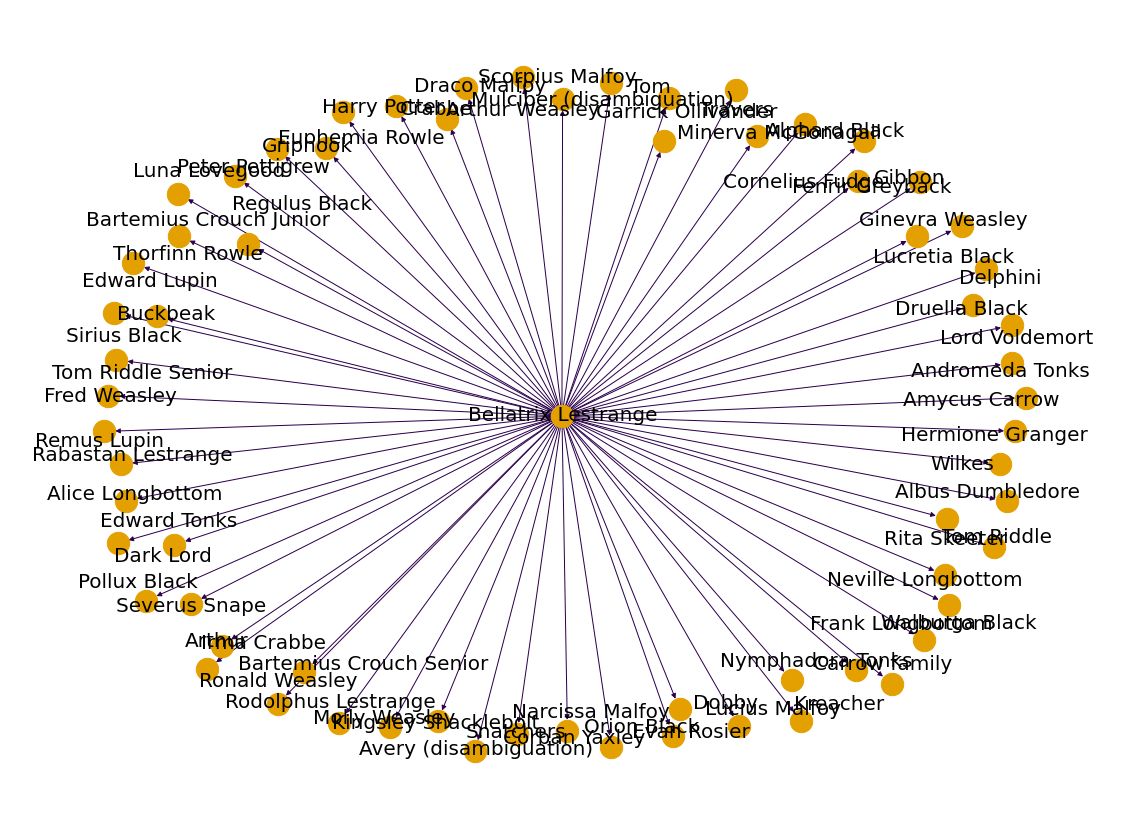

In [36]:
# A preview - Bellatrix Lestrange

fig,ax = plt.subplots()
fig.set_size_inches(20,15)
label = nx.draw_networkx_labels(Gtest, pos = nx.spring_layout(Gtest), font_size = 20, alpha=1, font_color = "black")
nx.draw(Gtest, node_size= 500, node_color=yellow, edge_color=purple, label=label)
#plt.savefig("BellatrixGraph.png", format="PNG",transparent=True)

### Sentiment
Here, the sentiment dataframe and dictionary are created, which will be used when the graph is created to make sentiment an attribute.

In [37]:
#This dataset keeps a happiness score for words
try:
    sentiment_dataset = pd.read_csv('Data\\dataset_S01.txt', delimiter = "\t", skiprows= [0,1])
    # Create dictionary of the words and happiness_average
    sd = dict(zip(list(sentiment_dataset.word),list(sentiment_dataset.happiness_average)))
except:
    sentiment_dataset = pd.read_csv('Data\\dataset_S01.txt',delimiter = "\t")
    # Create dictionary of the words and happiness_average
    sd = dict(zip(list(sentiment_dataset.word),list(sentiment_dataset.happiness_average)))

In [38]:
sentiment_dataset.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


### Appearances
In the wiki Fandom there is a list of appearances for each character so we add these as an attribute to work with later on. The appearance function can be found in the [Functions](#functions) section.

In [39]:
MOVIES_source = ["*{{PS|F}}","*{{COS|F}}","*{{POA|F}}","*{{GOF|F}}","*{{OOTP|F}}","*{{HBP|F}}","*{{DH|F1}}","*{{DH|F2}}"]
BOOKS_source = ["*{{PS}}","*{{COS}}","*{{POA}}","*{{GOF}}","*{{OOTP}}","*{{HBP}}","*{{DH}}"]
movie_dict = dict(zip(MOVIES_source,MOVIES_WIKI))
book_dict = dict(zip(BOOKS_source,BOOKS_WIKI))

## 4.1 Generating the Harry Potter network <a class="anchor" id="section_3_1"></a>

In [40]:
# GENERATING A GRAPH FOR ALL CONNECTIONS NOW 
sent_dict = {}
appearance_dict_books = {}
appearance_dict_movies = {}
word_count_dict={}        

# Initialize graph
G = nx.DiGraph()

# loop through the list of characters and link it to the characters appearing in it's Fandom page
for Wiki in char_list_wiki:
    current_char = Wiki.replace('_',' ')
    
    try:
        with open(os.path.join(sourcepath,Wiki)) as f:
            text = f.readlines()
    except FileNotFoundError:
        continue
    except UnicodeDecodeError:
        with open(os.path.join(sourcepath,Wiki), encoding = "utf-8") as f:
            text = f.readlines()
        
    text = ''.join(text)
    
    if (current_char == "Tom Riddle") or (current_char == "Dark Lord"):
        current_char = "Lord Voldemort"

    # Find all characters occuring in the text
    links = re.findall(r'\[\[(.+?)\]',text)
    
    # Fix text in the character list
    links = re.findall(r'\[\[(.+?)\]\]',text)
    CharsInPage = [char.split("|") if "|" in char else [char] for char in links]
    CharsInPage = [c.replace("[[","") for c in list(itertools.chain(*CharsInPage))]
    CharsInPage = [char for char in char_list_wiki if char.replace("_"," ") in CharsInPage]
    

    # Match the characters found on the page with the character list we have
    Characters = list(set([charfromwiki.replace("_"," ") for char in CharsInPage 
                           for charfromwiki in char_list_wiki if charfromwiki in char]))

    if current_char not in G.nodes():
        G.add_node(current_char)

    for Char in Characters:
        if (Char == "Dark Lord") or (Char == "Tom Riddle"): # Manual filtering
            Char = "Lord Voldemort"
        if current_char != Char: # Character cannot link to itself
            if Char == "Dark Lord":
                Char = "Lord Voldemort"
            if Char not in G.nodes():
                G.add_node(Char)

            G.add_edge(current_char, Char)
            
        
    #### Appearances ##########
    appearance_dict_books[current_char], appearance_dict_movies[current_char] = find_appearances(text)


    #### Word Count ##########
    word_count_dict[current_char] = char_count_words(text)
    
        
    #### Sentiment ##########
    words = re.split(r'\W+', text)
    words_clean = [w.lower() for w in words if w not in string.punctuation+string.digits and \
                   not w.isnumeric()]
    words_str = ' '.join(words_clean)
    
    sent_dict[current_char] = sentiment(words_str,sd)
        

In [41]:
# Add attributes to the graph
nx.set_node_attributes(G, values = sent_dict, name = 'sentiment')
nx.set_node_attributes(G, values = appearance_dict_books, name = "book appearances")
nx.set_node_attributes(G, values = appearance_dict_movies, name = "movie appearances")
nx.set_node_attributes(G, values = word_count_dict, name = "word count")

In [42]:
# Filter out characters that do not appear in the movies or books - f.x. only in video games
nodes_no_appearance = [node for node, attr in G.nodes(data=True) if (attr.get('book appearances') == []) & (attr.get('movie appearances') == [])]
G.remove_nodes_from(nodes_no_appearance)

In [43]:
# Remove isolated nodes
isolated_nodes = [u for u,v in dict(G.degree()).items() if v == 0]
G.remove_nodes_from(isolated_nodes)

In [44]:
print_network_info(G)

Number of nodes in the network is 509
Number of links in the network is 8150
Average degree in the  network is 32.02


In [45]:
# Check how many connections Harry Potter has
HPconn = [v for u,v in dict(G.degree()).items() if u == "Harry Potter"][0]
print(f"Harry Potter has {HPconn} connections")

Harry Potter has 499 connections


### Plotting the Network using Force Atlas

In [46]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=3.0,
                        strongGravityMode=False,
                        gravity=0.3,

                        # Log
                        verbose=True)

In [47]:
#We change our graph to undirected before plotting it
Gundir = G.to_undirected()

degrees = list(dict(Gundir.degree()).values())

In [48]:
positions = forceatlas2.forceatlas2_networkx_layout(Gundir, pos=None, iterations=2000)

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(15,12)

nx.draw_networkx_nodes(Gundir, positions,node_color=purple, node_size = degrees, alpha=0.4)
nx.draw_networkx_edges(G=Gundir, pos=positions, edge_color=yellow, alpha=0.05)
plt.axis('off')
plt.savefig("HarryPotterNetwork.pdf", format="pdf")
plt.show()

### Splitting the network into two networks 
One for the books and one for the films and then into different networks for each book/film.

In [50]:
book_nodes = [n for n,d in G.nodes(data=True) if d.get('book appearances') != []]
movie_nodes = [n for n,d in G.nodes(data=True) if d.get('movie appearances') != []]

# Subgraphs
Gbooks = G.subgraph(book_nodes)
Gmovies =  G.subgraph(movie_nodes)

print('BOOKS')
print_network_info(Gbooks, "book-")
print('-----------------------------------')
print('FILMS')
print_network_info(Gmovies,"film-")

BOOKS
Number of nodes in the book-network is 480
Number of links in the book-network is 7503
Average degree in the book- network is 31.26
-----------------------------------
FILMS
Number of nodes in the film-network is 335
Number of links in the film-network is 7034
Average degree in the film- network is 41.99


In [51]:
# Split up network by appearances
# Generate a dictionary containing the characters appearing in each book 
Gbooksdict = {}
count = 1
for book in BOOKS_WIKI:
    Gbooksdict[count] = []
    for n,d in G.nodes(data=True):
        try:
            if book in d.get("book appearances"):
                Gbooksdict[count].append(n) #= [n for n,d in G.nodes(data=True) try if book in d.get("book appearances") except continue]
        except:
            continue
    count += 1
    
# Generate a dictionary containing the characters appearing in each movie
Gmoviesdict = {}
count = 1
for movie in MOVIES_WIKI:
    Gmoviesdict[count] = [] 
    for n,d in G.nodes(data=True):
        try:
            if movie in d.get("movie appearances"):
                Gmoviesdict[count].append(n) #= [n for n,d in G.nodes(data=True) try if book in d.get("book appearances") except continue]
        except:
            continue
            
    count+=1

In [52]:
# Now generate a subgraph for each book/movie in a dictionary
Gsub_books = {}
Gsub_movies = {}
print('BOOKS')
for key, charlist in Gbooksdict.items():
    Gsub_books[key] = G.subgraph(charlist)
    print("Number of characters in Network for book nr {} are {}".format(key, len(charlist)))
print('------------------------------------------')
print('FILMS')
for key, charlist in Gmoviesdict.items():
    Gsub_movies[key] = G.subgraph(charlist)
    print("Number of characters in Network for film nr {} are {}".format(key, len(charlist)))

BOOKS
Number of characters in Network for book nr 1 are 131
Number of characters in Network for book nr 2 are 104
Number of characters in Network for book nr 3 are 105
Number of characters in Network for book nr 4 are 184
Number of characters in Network for book nr 5 are 238
Number of characters in Network for book nr 6 are 211
Number of characters in Network for book nr 7 are 217
------------------------------------------
FILMS
Number of characters in Network for film nr 1 are 77
Number of characters in Network for film nr 2 are 86
Number of characters in Network for film nr 3 are 74
Number of characters in Network for film nr 4 are 95
Number of characters in Network for film nr 5 are 150
Number of characters in Network for film nr 6 are 109
Number of characters in Network for film nr 7 are 123
Number of characters in Network for film nr 8 are 100


<font color=green>**Interpretation**<font>
    
**This analysis shows that the film networks contains fewer characters than the book network.** Interestingly, there are much fewer characters in the first film, *Harry Potter and the philosopher's stone* than in the corresponding book. This could be due to it being the first film and therefore the screenwriters perhaps did not put as much work in it as it was a test run to see if it would become popular. Maybe there were more budget constraints or they cut more scenes out of the storyline. We also notice that the number of characters differ a lot throughout the series!

## 4.2  Analysing according to Literature <a class="anchor" id="section_3_2"></a>

As a start, let's look at the nodes with most connections, films versus books.
At first glance, we see that Rubeus Hagrid and Dolores Umbridge have more connections in the books than in the films. On the other hand, Sirius Black and Minerva McGonagall have more connections in the films. This can be explained by characters being dropped in the movies that were connected to Hagrid and Dolores but not Sirius and Minerva.

In [53]:
# Top 10 characters according to node degree
print("BOOKS")
MaxToMinInDegree_list = sorted(Gbooks.degree, key=lambda x: x[1], reverse=True)
CharHighestIn = MaxToMinInDegree_list[0]
print(MaxToMinInDegree_list[0:10])
print("-----------------------------------------------------------")
print("FILMS")
MaxToMinInDegree_list = sorted(Gmovies.degree, key=lambda x: x[1], reverse=True)
CharHighestIn = MaxToMinInDegree_list[0]
print(MaxToMinInDegree_list[0:10])

BOOKS
[('Harry Potter', 492), ('Lord Voldemort', 359), ('Albus Dumbledore', 351), ('Ronald Weasley', 327), ('Hermione Granger', 313), ('Tom', 261), ('Severus Snape', 216), ('Draco Malfoy', 198), ('Ginevra Weasley', 194), ('Dolores Umbridge', 190)]
-----------------------------------------------------------
FILMS
[('Harry Potter', 410), ('Lord Voldemort', 318), ('Albus Dumbledore', 310), ('Ronald Weasley', 303), ('Hermione Granger', 281), ('Tom', 230), ('Severus Snape', 209), ('Draco Malfoy', 196), ('Ginevra Weasley', 185), ('Sirius Black', 182)]


### 4.2.1 Degree Distributions <a class="anchor" id="section_3_2_1"></a>

In the figures below we can see that the distributions are all very similar, with the film network having smaller counts as it contains fewer characters overall. 

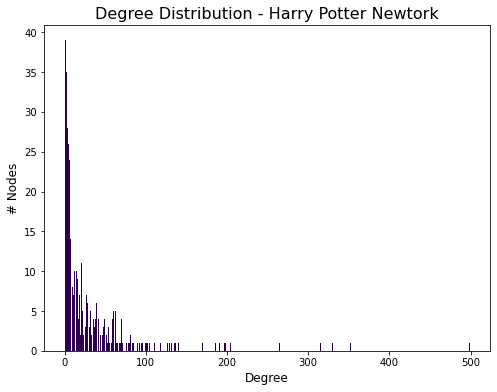

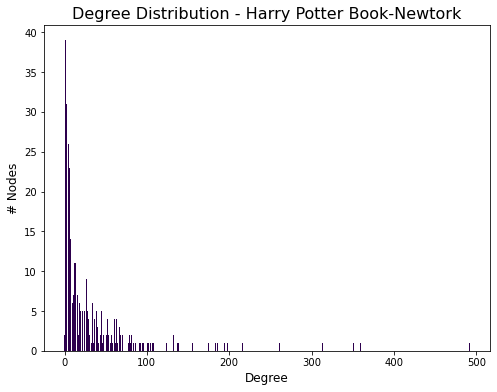

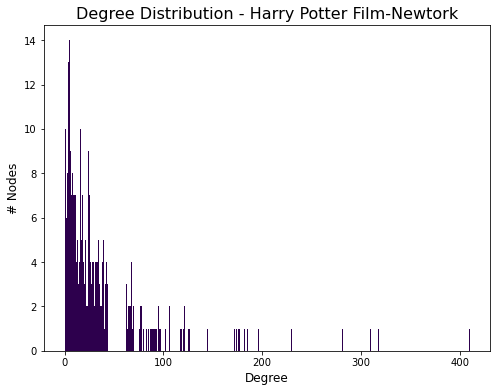

In [54]:
# The network as a whole
plot_degree_distribution(G, 'Degree Distribution - Harry Potter Newtork')
plot_degree_distribution(Gbooks, 'Degree Distribution - Harry Potter Book-Newtork')
plot_degree_distribution(Gmovies, 'Degree Distribution - Harry Potter Film-Newtork')

**Is there any nodes with high out-degree and a few incoming connections?**

We see in the output below that both networks show similar characters. Interestingly, the first character "Lee Jordan" is kind of a minor character which probably explains the few incoming connections. Pansy Parkinson, according to the wiki-page is one of Draco Malfoys pals and is therefore a bigger character than "Lee Jordan". The few incoming connections tell us that not many character pages mention their name but they have a lot of character mentions on their pages.   

In [55]:
degdiffdict = {}
for node in Gbooks.nodes():
    degdiffdict[node] = Gbooks.out_degree(node) - Gbooks.in_degree(node) 
    
degdiffdictmovies = {}
for node in Gmovies.nodes():
    degdiffdictmovies[node] = Gmovies.out_degree(node) - Gmovies.in_degree(node) 
    
HPTop5books = dict(sorted(degdiffdict.items(), key=lambda item: item[1],reverse=True)[0:5]) # Show first 5
HPTop5movies = dict(sorted(degdiffdictmovies.items(), key=lambda item: item[1],reverse=True)[0:5]) # Show first 5
print("BOOKS")
print(HPTop5books)
print('-----------------------------------------------------------------------------------------')
print("FILMS")
print(HPTop5movies)

BOOKS
{'Lee Jordan': 31, 'Pansy Parkinson': 26, 'Parvati Patil': 23, 'Argus Filch': 20, 'Seamus Finnigan': 18}
-----------------------------------------------------------------------------------------
FILMS
{'Lee Jordan': 31, 'Pansy Parkinson': 26, 'Parvati Patil': 22, 'Argus Filch': 21, 'Dean Thomas': 18}


**5 Most central characters according to eigenvector centrality**

Eigenvector centrality: Eigenvector centrality measures a node’s importance while giving consideration to the importance of its neighbors. That is, links from important nodes are worth more than links from unimportant nodes [[ref]](https://www.sci.unich.it/~francesc/teaching/network/eigenvector.html). 

The characters having high wiki-Fandom graph eigenvector centrality means that **they are connected to characters that have a high number of links to other characters**. Regarding the wiki Fandom page, their pages mention characters that have a lot of referral to other characters.

**<font color=green>Interpretation:</font>**

We can see from the outputs below that major characters have the highest eigenvector centrality, which is no surprise. This is especially true for Lord Voldemort and Harry Potter, having the highest in-edge eigenvector centrality as we would expect every character's page to mention them at some point!

In [56]:
print("BOOKS")
print('Five most central characters according to their eigenvector centrality (in-edges)\n')
EigenCent = nx.eigenvector_centrality(Gbooks)
EigenChars = sorted(EigenCent.items(), key=lambda item: item[1],reverse=True)
for i in range(0,5):
    print(EigenChars[i])

# Calculate centrality corresponding to in- and out-edges as well
print('\nFive most central characters according to their eigenvector centrality (out-edges)')
EigenCent2 = nx.eigenvector_centrality(Gbooks.reverse())
EigenChars2 = sorted(EigenCent2.items(), key=lambda item: item[1],reverse=True)
EigenChars2[0:5]

BOOKS
Five most central characters according to their eigenvector centrality (in-edges)

('Harry Potter', 0.23547457576914146)
('Tom', 0.23269181030373914)
('Lord Voldemort', 0.23215007618752787)
('Ronald Weasley', 0.20451653835173936)
('Hermione Granger', 0.20282638174501955)

Five most central characters according to their eigenvector centrality (out-edges)


[('Harry Potter', 0.21701964572295307),
 ('Ronald Weasley', 0.19467161807219552),
 ('Albus Dumbledore', 0.19097697734438543),
 ('Hermione Granger', 0.18149231597754195),
 ('Ginevra Weasley', 0.15432394689174506)]

In [57]:
print("FILMS")
print('Five most central characters according to their eigenvector centrality (in-edges)\n')
EigenCent = nx.eigenvector_centrality(Gmovies)
EigenChars = sorted(EigenCent.items(), key=lambda item: item[1],reverse=True)
for i in range(0,5):
    print(EigenChars[i])

# Calculate centrality corresponding to in- and out-edges as well
print('\nFive most central characters according to their eigenvector centrality (out-edges)')
EigenCent2 = nx.eigenvector_centrality(Gmovies.reverse())
EigenChars2 = sorted(EigenCent2.items(), key=lambda item: item[1],reverse=True)
EigenChars2[0:5]

FILMS
Five most central characters according to their eigenvector centrality (in-edges)

('Harry Potter', 0.2329756401182298)
('Tom', 0.22871605134531384)
('Lord Voldemort', 0.22845686589427566)
('Ronald Weasley', 0.20558621469968813)
('Hermione Granger', 0.2017435061369432)

Five most central characters according to their eigenvector centrality (out-edges)


[('Harry Potter', 0.21434077860083817),
 ('Ronald Weasley', 0.1952243697403236),
 ('Albus Dumbledore', 0.18953121570515946),
 ('Hermione Granger', 0.18051852526872184),
 ('Ginevra Weasley', 0.15491304760273983)]

### 4.2.2 Evolution of Character Importance <a class="anchor" id="evolutionofcharacterimportance"></a>

Character importance can be analyzed by looking at a property called degree centrality $C_{d}$, which can be computed for each node, $d$, as the fraction of nodes it is connected to.  Another property, the betweenness centrality, tells us the most influential node in the network.


The following analysis is inspired by [this article](https://www.kaggle.com/code/mmmarchetti/game-of-thrones-network-analysis) on a Game of Thrones network analysis. We wanted to see if there is a difference in character importance throughout the films and books. 

**5 most central characters according to betweenness centrality**

First we will look at the betweenness centrality. That is characters that are "bridges" between other characters in the network. 

**<font color=green>Interpretation:</font>**

As the film and book networks seem to give almost the same output as they are related to the Fandom pages then we only look at the network as a whole here. The results are not surprising again. Albus Dumbledore being the second highest makes sense as he is the headmaster and heart of the series, so he connects the students to each other. This can also be said about Hagrid as he is a beloved teacher and friend of Harry's. Harry Potter is the leader throughout the book and most people know each other through him and then his best friends, Ron and Hermione. 

In [58]:
print('Ten most central characters according to their betweenness centrality')
BetweenCent = nx.betweenness_centrality(Gbooks)
BetweenCharsbooks = sorted(BetweenCent.items(), key=lambda item: item[1],reverse=True)

BetweenCent = nx.betweenness_centrality(Gmovies)
BetweenCharsmovies = sorted(BetweenCent.items(), key=lambda item: item[1],reverse=True)

print("BOOKS")
for key, value in BetweenCharsbooks[0:10]:
    print(f'{key} {value}')
print("-------------------------------------------------")
print("FILMS")
for key, value in BetweenCharsmovies[0:10]:
    print(f'{key} {value}')

Ten most central characters according to their betweenness centrality
BOOKS
Harry Potter 0.2044358222143191
Albus Dumbledore 0.11082972966280527
Lord Voldemort 0.08235981274009506
Ronald Weasley 0.07013815175578465
Hermione Granger 0.05298649035070805
Arthur Weasley 0.028431968194067906
Rubeus Hagrid 0.024385405117903186
Horace Slughorn 0.02022875493633532
Draco Malfoy 0.02019810084187145
Minerva McGonagall 0.01952912910633693
-------------------------------------------------
FILMS
Harry Potter 0.18965145750332407
Albus Dumbledore 0.09848629134756243
Lord Voldemort 0.08710617455628444
Ronald Weasley 0.07477678477040187
Hermione Granger 0.04692256151356255
Sirius Black 0.028134300200730173
Draco Malfoy 0.02637983423368803
Rubeus Hagrid 0.02620140040980765
Phineas Nigellus Black 0.026036412250447383
Horace Slughorn 0.02543411151249271


#### 10 most important characters according to degree centrality

In [59]:
# Calculating the degree centrality 
deg_cen_books = nx.degree_centrality(Gbooks)
deg_cen_movies = nx.degree_centrality(Gmovies)

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_books =  sorted(deg_cen_books.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_movies =  sorted(deg_cen_movies.items(), key=lambda x:x[1], reverse=True)[0:10]

print("BOOKS")
for key, value in sorted_deg_cen_books:
    print(f'{key} {value}')
print("-------------------------------------------------")
print("FILMS")
for key, value in sorted_deg_cen_movies:
    print(f'{key} {value}')

BOOKS
Harry Potter 1.0271398747390397
Lord Voldemort 0.7494780793319414
Albus Dumbledore 0.7327766179540709
Ronald Weasley 0.6826722338204593
Hermione Granger 0.6534446764091857
Tom 0.5448851774530271
Severus Snape 0.45093945720250517
Draco Malfoy 0.4133611691022964
Ginevra Weasley 0.40501043841336115
Dolores Umbridge 0.3966597077244258
-------------------------------------------------
FILMS
Harry Potter 1.2275449101796407
Lord Voldemort 0.9520958083832336
Albus Dumbledore 0.9281437125748504
Ronald Weasley 0.9071856287425151
Hermione Granger 0.8413173652694611
Tom 0.688622754491018
Severus Snape 0.625748502994012
Draco Malfoy 0.5868263473053893
Ginevra Weasley 0.5538922155688623
Sirius Black 0.5449101796407186


#### Plotting the evolution of character importance

Now, we will plot the evolution of character importance throughout the films and books for the three main characters Harry Potter, Ronald Weasley and Hermione Granger. From the analysis above, and from our experience of reading the books and seeing the movies, we wanted to investigate Rubeus Hagrid and Sirius Black as well. This is due to Hagrid seemingly having a bigger role in the books than in the films, and vice versa for Sirius Black. Additionally, Hagrid having a higher degree centrality in the books shows that the characters excluded from the films seem to have had more connection to Hagrid than Sirius.

In [60]:
# Get the degree centrality evolution dataframe for each character 
deg_evol_df_books = calculate_evol_importance(Gsub_books)
deg_evol_df_movies = calculate_evol_importance(Gsub_movies)

# Get the betweenness centrality evolution dataframe for each character 
deg_evol_df_books_bet = calculate_evol_importance_between(Gsub_books)
deg_evol_df_movies_bet = calculate_evol_importance_between(Gsub_movies)

# Get labels for books and movies
idx = MOVIES_WIKI[0].find("the")
movielbls = [movie[idx+4:].replace("(film)","").strip() for movie in MOVIES_WIKI]
booklbls = [book[idx+4:].strip() for book in BOOKS_WIKI]

# Define important characters to look into
imp_chars = ['Harry Potter', 'Hermione Granger',"Ronald Weasley", "Rubeus Hagrid", "Sirius Black"]


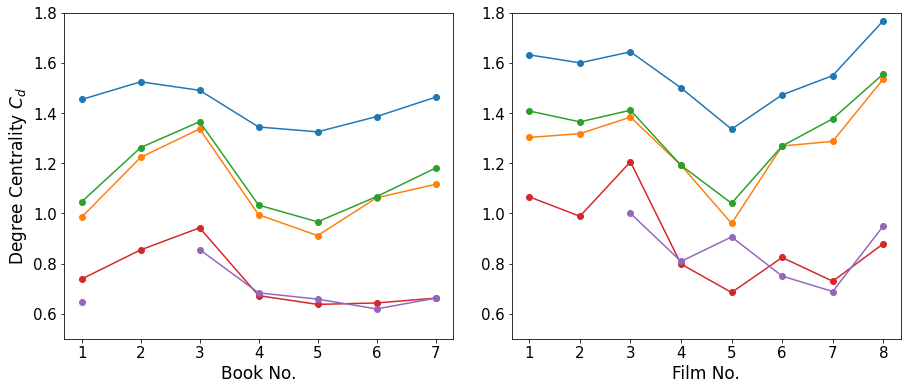

In [61]:
# Plotting the degree centrality evolution of imp_chars

FONTSIZE = 17 # constant
fig,ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,6)
fig.subplots_adjust(wspace=0.15)

colors = [purple,"#AE0001",yellow,"#2A623D","black"]
plt.rc('axes', prop_cycle=(cycler('color', colors)))
xlabel=["Book No.","Film No."]
no = [8,9]

deg_evol = [deg_evol_df_books, deg_evol_df_movies]

for i in range(0,2):
    ax[i].plot(deg_evol[i][imp_chars],'o-')
    #ax[0].legend(imp_chars,fontsize=FONTSIZE-5)
    ax[i].set_xticklabels(labels=range(0,no[i]),fontsize=FONTSIZE-2)
    ax[i].set_xlabel(xlabel[i], fontsize=FONTSIZE)
    ax[0].set_ylabel("Degree Centrality $C_{d}$",fontsize=FONTSIZE)
    ax[i].tick_params(axis='both', which='major', labelsize=FONTSIZE-2)
    ax[i].set_ylim(0.5,1.8)

plt.savefig("EvolImportance_Deg_Centrality.png", format="PNG")
plt.show()

In [62]:
deg_evol_df_movies

,Firenze,Filius Flitwick,Poppy Pomfrey,Peeves,Lucius Malfoy,Albus Dumbledore,Neville Longbottom,Dean Thomas,Gunhilda de Gorsemoor,Severus Snape,...,Gornuk,Astoria Malfoy,Marius,Bogrod,Hugo Granger-Weasley,Lily L. Potter,Rose Granger-Weasley,Scorpius Malfoy,James Potter II,Albus Potter
0,0.302632,0.657895,0.486842,0.486842,0.552632,1.355263,0.986842,0.592105,0.013158,1.131579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.611765,0.505882,NaN,0.600000,1.352941,0.870588,0.552941,NaN,1.058824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.657534,0.589041,NaN,0.630137,1.369863,1.041096,0.616438,0.013699,1.123288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.489362,NaN,NaN,0.595745,1.170213,0.946809,0.510638,NaN,0.989362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.375839,NaN,NaN,0.476510,1.120805,0.744966,0.489933,NaN,0.771812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.564815,0.444444,NaN,0.620370,1.194444,0.851852,0.509259,NaN,1.009259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.565574,1.237705,0.811475,0.614754,NaN,0.926230,...,0.163934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.616162,0.515152,NaN,0.707071,1.343434,1.131313,0.696970,NaN,1.222222,...,NaN,0.161616,0.030303,0.070707,0.343434,0.464646,0.474747,0.393939,0.434343,0.616162


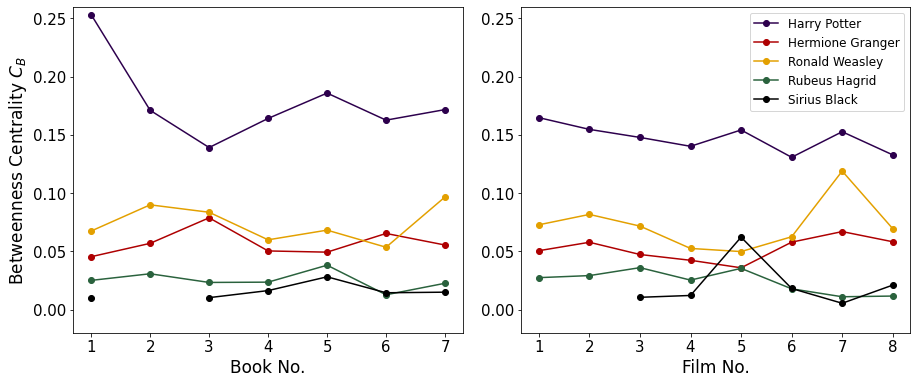

In [63]:
# Plotting the degree centrality evolution

fig,ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,6)
fig.subplots_adjust(wspace=0.15)

colors = [purple,"#AE0001",yellow,"#2A623D","black"]
plt.rc('axes', prop_cycle=(cycler('color', colors)))
xlabel=["Book No.","Film No."]
no = [8,9]

deg_evol = [deg_evol_df_books_bet, deg_evol_df_movies_bet]

for i in range(0,2):
    ax[i].plot(deg_evol[i][imp_chars],'o-')
    #ax[1].legend(imp_chars,fontsize=12, bbox_to_anchor=(1, 0.5))
    ax[1].legend(imp_chars,fontsize=FONTSIZE-5)
    ax[i].set_xticklabels(labels=range(0,no[i]),fontsize=FONTSIZE-2)
    ax[i].set_xlabel(xlabel[i], fontsize=FONTSIZE)
    ax[0].set_ylabel("Betweenness Centrality $C_{B}$",fontsize=FONTSIZE)
    ax[i].tick_params(axis='both', which='major', labelsize=FONTSIZE-2)
    ax[i].set_ylim(-0.02,0.26)
    

plt.savefig("EvolImportance_Between_Centrality.png", format="PNG")
plt.show()

### 4.2.2 Assortativity <a class="anchor" id="section_3_2_2"></a>
#### Is the undirected version of the graph assortative with respect to degree?
Assortativity, also known as assortative mixing, is the tendency for network nodes to connect with others that are similar to them. Degree assortativity is a measure of similarity based on the degrees of the nodes.

The assortativity coefficient is represented as r. According to the Wikipedia page on Assortativity, "the assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes". We know that in general r lies between -1 and 1, where r=1 means perfect assortative mixing patterns in the network. On the other hand, when r=0 the network is non-assortative, while at r=-1 the network is completely disassortative. 

**<font color = green>Interpretation<font>**
    
We can see by the computation below that $r$ is negative so the networks are quite disassortative with respect to degree, that is high-degree characters do not seem to have a high tendancy to link to other high-degree characters, and vice versa for low-degree characters.

In [64]:
# Compute the degree assortativity of the Harry Potter Network
r = nx.degree_assortativity_coefficient(G.to_undirected()) 
rmovie = nx.degree_assortativity_coefficient(Gmovies.to_undirected()) 
rbook = nx.degree_assortativity_coefficient(Gbooks.to_undirected()) 
print(f'Assortativity of the Harry Potter network by degree, r = {r}')
print(f'Assortativity of the Harry Potter film-network by degree, r = {rmovie}')
print(f'Assortativity of the Harry Potter book-network by degree, r = {rbook}')

Assortativity of the Harry Potter network by degree, r = -0.2527996215670224
Assortativity of the Harry Potter film-network by degree, r = -0.25632580117785064
Assortativity of the Harry Potter book-network by degree, r = -0.276629141995883


### 4.2.3 The Small-World Effect in Harry Potter - Is it a small-world network? <a class="anchor" id="section_3_2_3"></a>

A study on the Harry Potter network as a small world and scale-free network was done in [this article](https://ijeecs.iaescore.com/index.php/IJEECS/article/viewFile/3766/2098). This gave us inspiration to look into these properties and see if this also applied to our network, which would show that even the Harry Potter wiki Fandom manages to capture the character network as in the books! The study states: "Studies show that the characters network in Harry Potter has got the small-world effect and scale-free feature. It is a typical complex network. The success of the novel Harry
Potter is precisely due to the complex properties of it..."

**But what does *small-world* mean?**

Small-world effect means the network has small average path length and large clustering coefficient [[ref]](https://www.nature.com/articles/30918). We therefore compute the average path length and clustering coefficient in the Harry Potter Network.

In [65]:
# Extract GCC for computation
Gundir, Gbooksundir, Gmoviesundir = G.to_undirected(), Gbooks.to_undirected(), Gmovies.to_undirected()
GCC = list(Gundir.subgraph(c) for c in nx.connected_components(Gundir))[0]
GCCbooks = list(Gbooksundir.subgraph(c) for c in nx.connected_components(Gbooksundir))[0]
GCCmovies = list(Gmoviesundir.subgraph(c) for c in nx.connected_components(Gmoviesundir))[0]

In [66]:
print_info_smallworldeffect(GCC)
print_info_smallworldeffect(GCCbooks,"Book-")
print_info_smallworldeffect(GCCmovies,"Film-")

Average shortest path length of the Harry Potter Network: <d> = 2.360556945841227
Average clustering coefficient of the Harry Potter Network: C = 0.5873733011193126
Average shortest path length of the Harry Potter Book-Network: <d> = 2.325855816010615
Average clustering coefficient of the Harry Potter Book-Network: C = 0.5960852826190376
Average shortest path length of the Harry Potter Film-Network: <d> = 2.1386719099115203
Average clustering coefficient of the Harry Potter Film-Network: C = 0.6260699622799901


**<font color=Green>Interpretation<font>**
    
    
From the computations above, we can see that the average shortest path length is very small (approximately 2 for all) compared to number of nodes and links in the network (smaller than in the [study](https://ijeecs.iaescore.com/index.php/IJEECS/article/viewFile/3766/2098) - 2.78). Additionally, the average clustering coefficient is large (larger than in the [study](https://ijeecs.iaescore.com/index.php/IJEECS/article/viewFile/3766/2098) - 0.42). This shows us that the Harry Potter network is a small-world network. This makes sense as most characters in the book can be found through the two main characters, Lord Voldemort and Harry Potter - resulting in a small average path length.

### 4.2.4 The Scale-Free Feature of the Characters Network  <a class="anchor" id="section_3_2_4"></a>

The study above states that the scale-free feature comes from the main characters all having a number of followers [[ref]](https://ijeecs.iaescore.com/index.php/IJEECS/article/viewFile/3766/2098). 



We want to investigate if the degree distribution $n(k)$, i.e., the number of connections each node has, obeys a power-law [[ref]](https://arxiv.org/pdf/cond-mat/0201476.pdf):
$$n(k) = k^{-\gamma}$$
with exponential cut-off, where $\gamma$ represents the degree exponent. Reports show that many scale-free networks have a degree exponent in the range 2 to 3, this is especially applicable to social and computer networks, see [Network Science book, Chapter 4](http://networksciencebook.com/chapter/4). 

Now, using the *powerlaw* package we do a power-law fit to the two networks and compute the degree exponent. Then we perform a power-law fit to the degree distribution (plotted in logarithmic scale) to confirm if the network is scale-free.

In [67]:
# Check the maximum and minimum degree 
MaxToMinDegree_list = sorted(G.degree, key=lambda x: x[1], reverse=True)
MaxDeg = MaxToMinDegree_list[0][1]
MinDeg = MaxToMinDegree_list[-1][1]
print(f'Maximum degree: {MaxDeg}')
print(f'Minimum degree: {MinDeg}')

degrees = [G.degree(n) for n in G.nodes()]
counts, bins = np.histogram(degrees, bins=np.arange(MinDeg,MaxDeg+1))

Maximum degree: 499
Minimum degree: 1


In [68]:
# Get degree distribution for movies and books for plotting
movie_degr_list, movie_bins, movie_counts = get_deg_dist(Gmovies)
book_degr_list, book_bins, book_counts = get_deg_dist(Gbooks)

In [69]:
#Print the slope of degree distribution for books and movies - fitting a power-law
m_alpha = powerlaw.Fit(movie_degr_list).alpha
b_alpha = powerlaw.Fit(book_degr_list).alpha

print('Slope of the degree distribution for the film: γ = {}'.format(m_alpha))
print('Slope of the degree distribution for the books: γ = {}'.format(b_alpha))

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Slope of the degree distribution for the film: γ = 2.8917411915090336
Slope of the degree distribution for the books: γ = 2.730195847025973


Values less than or equal to 0 in data. Throwing out 0 or negative values


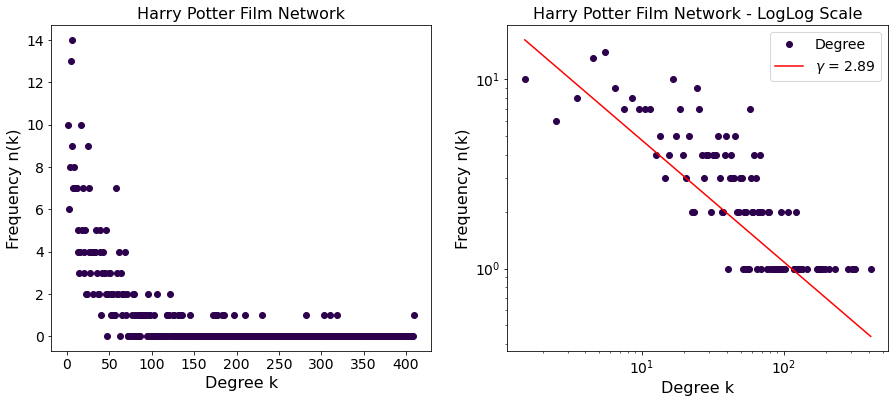

In [70]:
plot_powerlaw(movie_bins, movie_counts, \
              logtitle = "Harry Potter Film Network - LogLog Scale",regtitle="Harry Potter Film Network", alpha=m_alpha)
plt.savefig("Powerlaw_Movies.png", format="PNG")

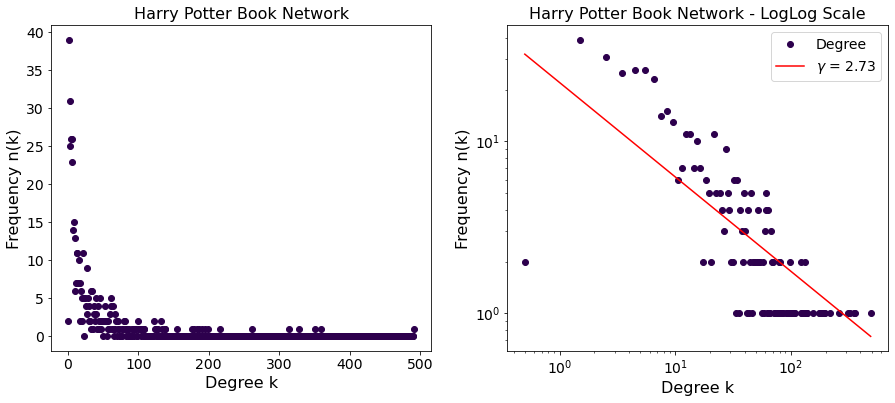

In [71]:
%matplotlib inline
plot_powerlaw(book_bins, book_counts, \
              logtitle = "Harry Potter Book Network - LogLog Scale",regtitle="Harry Potter Book Network",alpha=b_alpha)
plt.savefig("Powerlaw_Books.png", format="PNG")

**<font color=green>Interpretation<font>**

The degree exponents $\gamma$ for both networks are in the desired range of approximately $2.8$. From this and the two plots above it can be seen that the degree distribution of the characters networks in Harry Potter books and films satisfy power-law and the networks are therefore *scale-free*. However, the book network has more power-law relationship than the film network! It is evident this is due to the character network being altered when the books were converted to film scripts, as all characters couldn't be included. Even major characters such as **Charley Weasley**, Ron Weasley's brother and the second oldest son of Arthur and Molly Weasley and the mischief making ghost **Peeves** [[ref]](https://timesofindia.indiatimes.com/life-style/books/features/harry-potter-characters-who-didnt-appear-in-movies/articleshow/87850266.cms). 

# 3. Text Analysis <a class="anchor" id="chapter4"></a>

### Load The Book Datasets

In [72]:
#This dataset keeps a happyness score for words
data = sentiment_dataset.copy() 

#Create a dictionary only with the word and its corresponding happyness_average score
L1 = list(data.word)
L2 = list(data.happiness_average)
d = dict(zip(L1,L2))


#Get the path for the books
path = os.getcwd() +"\\Data\\"
books = os.listdir(path+"\\Books\\")


In [73]:
book_sentiments = {}

path = os.getcwd() +"\\Data\\"

books = os.listdir(path+"\\Books\\")
#Book names
hp = 'Harry Potter and the'
hp_name_lis = [hp+' Philosophers Stone',hp+' Chamber of Secrets',hp+' Prisoner of Azkaban',hp+' Goblet of Fire',
              hp+' Order of the Phoenix',hp+' Half Blood Prince',hp+' Deathly Hallows']


book_dict = {}
c=0
for i in range(len(books)):
    if ".txt" in books[i]:
        try:
            with open(os.path.join(path+"\\Books\\",str(books[i])), "r", encoding="utf-8") as f:
                    Book1 = f.read()
        except:
            book =  urllib.parse.quote(books[i])
            with open(os.path.join(path+"\\Books\\",str(book)), "r", encoding="utf-8") as f:
                    Book1 = f.read()
                
        #To find which book it is as 'listdir' doesn't put them in correct order, the fourth index of the file name is 
        #The book number
        name = books[i][4]
        
    
        Book = Book1.replace('\n',' ')
        #The book + author name is always on top of every page
        Book = Book.replace(hp_name_lis[int(name)-1]+' - J.K. Rowling','')
        
        Book = Book.replace(hp_name_lis[int(name)-1]+' -J.K. Rowling','')

        words = re.split(r'\W+', Book)

        words_clean = [w.lower() for w in words if w not in string.punctuation+string.digits and \
                           not w.isnumeric()]

        words_str = ' '.join(words_clean)
        #print(words_clean)

        
        book_dict[name]=words_clean
        book_sentiments[name]=sentiment(words_str,d)
       
            

### Extract Book Dialogue

We wanted to try to extract book dialogue to compare to the film dialogues. This was done by using regular expressions. It finds where quotations are and extracts the text including quotations and what comes after quotations until period in a tuple. So the element of the tuple is the dialogue and the second element is a text stating who said it. Examples of the tuples are shown below:

            ('Of course you can,', ' said Snape, sneering')
            
The code can than seach if the string in the second element of the tuple contains the name of a Harry Potter character. It should be noted that when the string in the second element contains pronouns, the program is unable to detect who is speaking. Example below:

            ('Narcissa!', ' he said, in a squeaky voice')
            
This results in some dialogue being lost, but it was not implemented due to lack of study.

In [76]:
#Some characters are only reffered to by their first names (e.g. Harry, Ron) and some only their 
#last names (e.g. Snape). We want to replace with first and last names 
names_used = {'Draco':'Draco Malfoy','Hermione':'Hermione Granger','Ginny':'Ginny Weasley',\
              'Snape':'Severus Snape','Professor Dumbledore':'Albus Dumbledore',\
              'Dumbledore':'Albus Dumbledore','Neville':'Neville Longbottom','Sirius':'Sirius Black',\
              'Harry':'Harry Potter','Ron':'Ron Weasley','Luna':'Luna Lovegood','Hagrid':'Rubeus Hagrid',
             'Bellatrix':'Bellatrix Lestrange','Malfoy':'Draco Malfoy'}


#Find which last-names are not shared with more than one person:
last_name_dict = dict(nltk.FreqDist([char.split()[-1] for char in char_list if len(char.split())>1]))
uncommon_last_names = [last_name for last_name, count in last_name_dict.items() if count==1]

In [77]:

Book_dialogues = {}

char_nodes = list(G.nodes())
char_book_dialog_count={}

#Create a book dialogue dictionary for each book.
character_sentiment = {}
for i in range(len(books)):
    char_book_dialog={}
    
    #Sometimes a weird file starting with . appears after doing listdir.
    if not books[i].startswith('.'):
        with open(path+"\\Books\\"+books[i], encoding="utf-8") as f:
            Book = f.read()
    
        FindBookDialogs(Book,char_list)
        #Fourth index is the book number
        name=books[i][4]
        Book_dialogues[name]=char_book_dialog

### Load the Film Dialogue Dataset

In [78]:
#List the filenames
films = os.listdir(path+"Movie_scripts")

film_dict = {}
film_sentiments = {}
c=0

film_dialog = {}
for i in range(len(films)):
    if not films[i].startswith('.'):
        
        Film = pd.read_csv(path+"Movie_scripts\\"+films[i])
        
        
        #To find which film it is as 'listdir' doesn't put them in correct order, the second index of the file name is 
        #The book number
        name = films[i][2]
        
        film_dict[name]=Film[Film.dialog.notna()]
                
        words=' '.join(list(Film[Film.dialog.notna()].dialog))

        words_clean = [w.lower() for w in words if w not in string.punctuation+string.digits and \
                                   not w.isnumeric()]
        
        words_str=''.join(words_clean)
                
        film_sentiments[name]=sentiment(words_str,d)
        
        film_dialog[name]=words_str.split()
        

## 5.1 TF-IDF WordClouds  <a class="anchor" id="section_4_1"></a>

Here we calculate the TF-IDF for each book and film using the datasets we just loaded. Word clouds are also plotted where larger words have more importance. This is done so we can compare if similar words appear in both and analyse why some words are more significant than others.

In [ ]:
#Sort from first to last book
book_dict=dict(sorted(book_dict.items(), key=lambda x: int(x[0]), reverse=False))

# Calculate TF for each book
TF = []
for i in range(1,8):
    TF.append(nltk.FreqDist(book_dict[str(i)]))
    
# Calculate TF-IDF for each book
IDF = computeIDF(TF)
TF_IDF = compute_tfidf(TF, IDF,7)

In [79]:
# Calculate TF-IDF for each film:

# Save the TF for later use
TF = []
for i in range(1,9):
    TF.append(nltk.FreqDist(film_dialog[str(i)]))

IDF = computeIDF(TF)
TF_IDF_film = compute_tfidf(TF, IDF,8)

In [80]:
# Color Palette for the word cloud plots

n_bins = [3, 6, 10, 100] 
hpcolors = ['#9c1203','#e3a000']

#change to rgb
hp_rgb = [tuple([i/256 for i in ImageColor.getrgb(color)]) for color in hpcolors]
cmap = LinearSegmentedColormap.from_list('HarryPotter', hp_rgb)


# Film name list for plotting 
hp_film_lis = hp_name_lis[:]

hp_film_lis[-1]=hp_film_lis[-1]+' Part 1'

hp_film_lis.append(hp_name_lis[-1]+' Part 2')


hp_film_lis=['Film: '+ name for name in hp_film_lis]
hp_name_lis=['Book: '+ name for name in hp_name_lis]

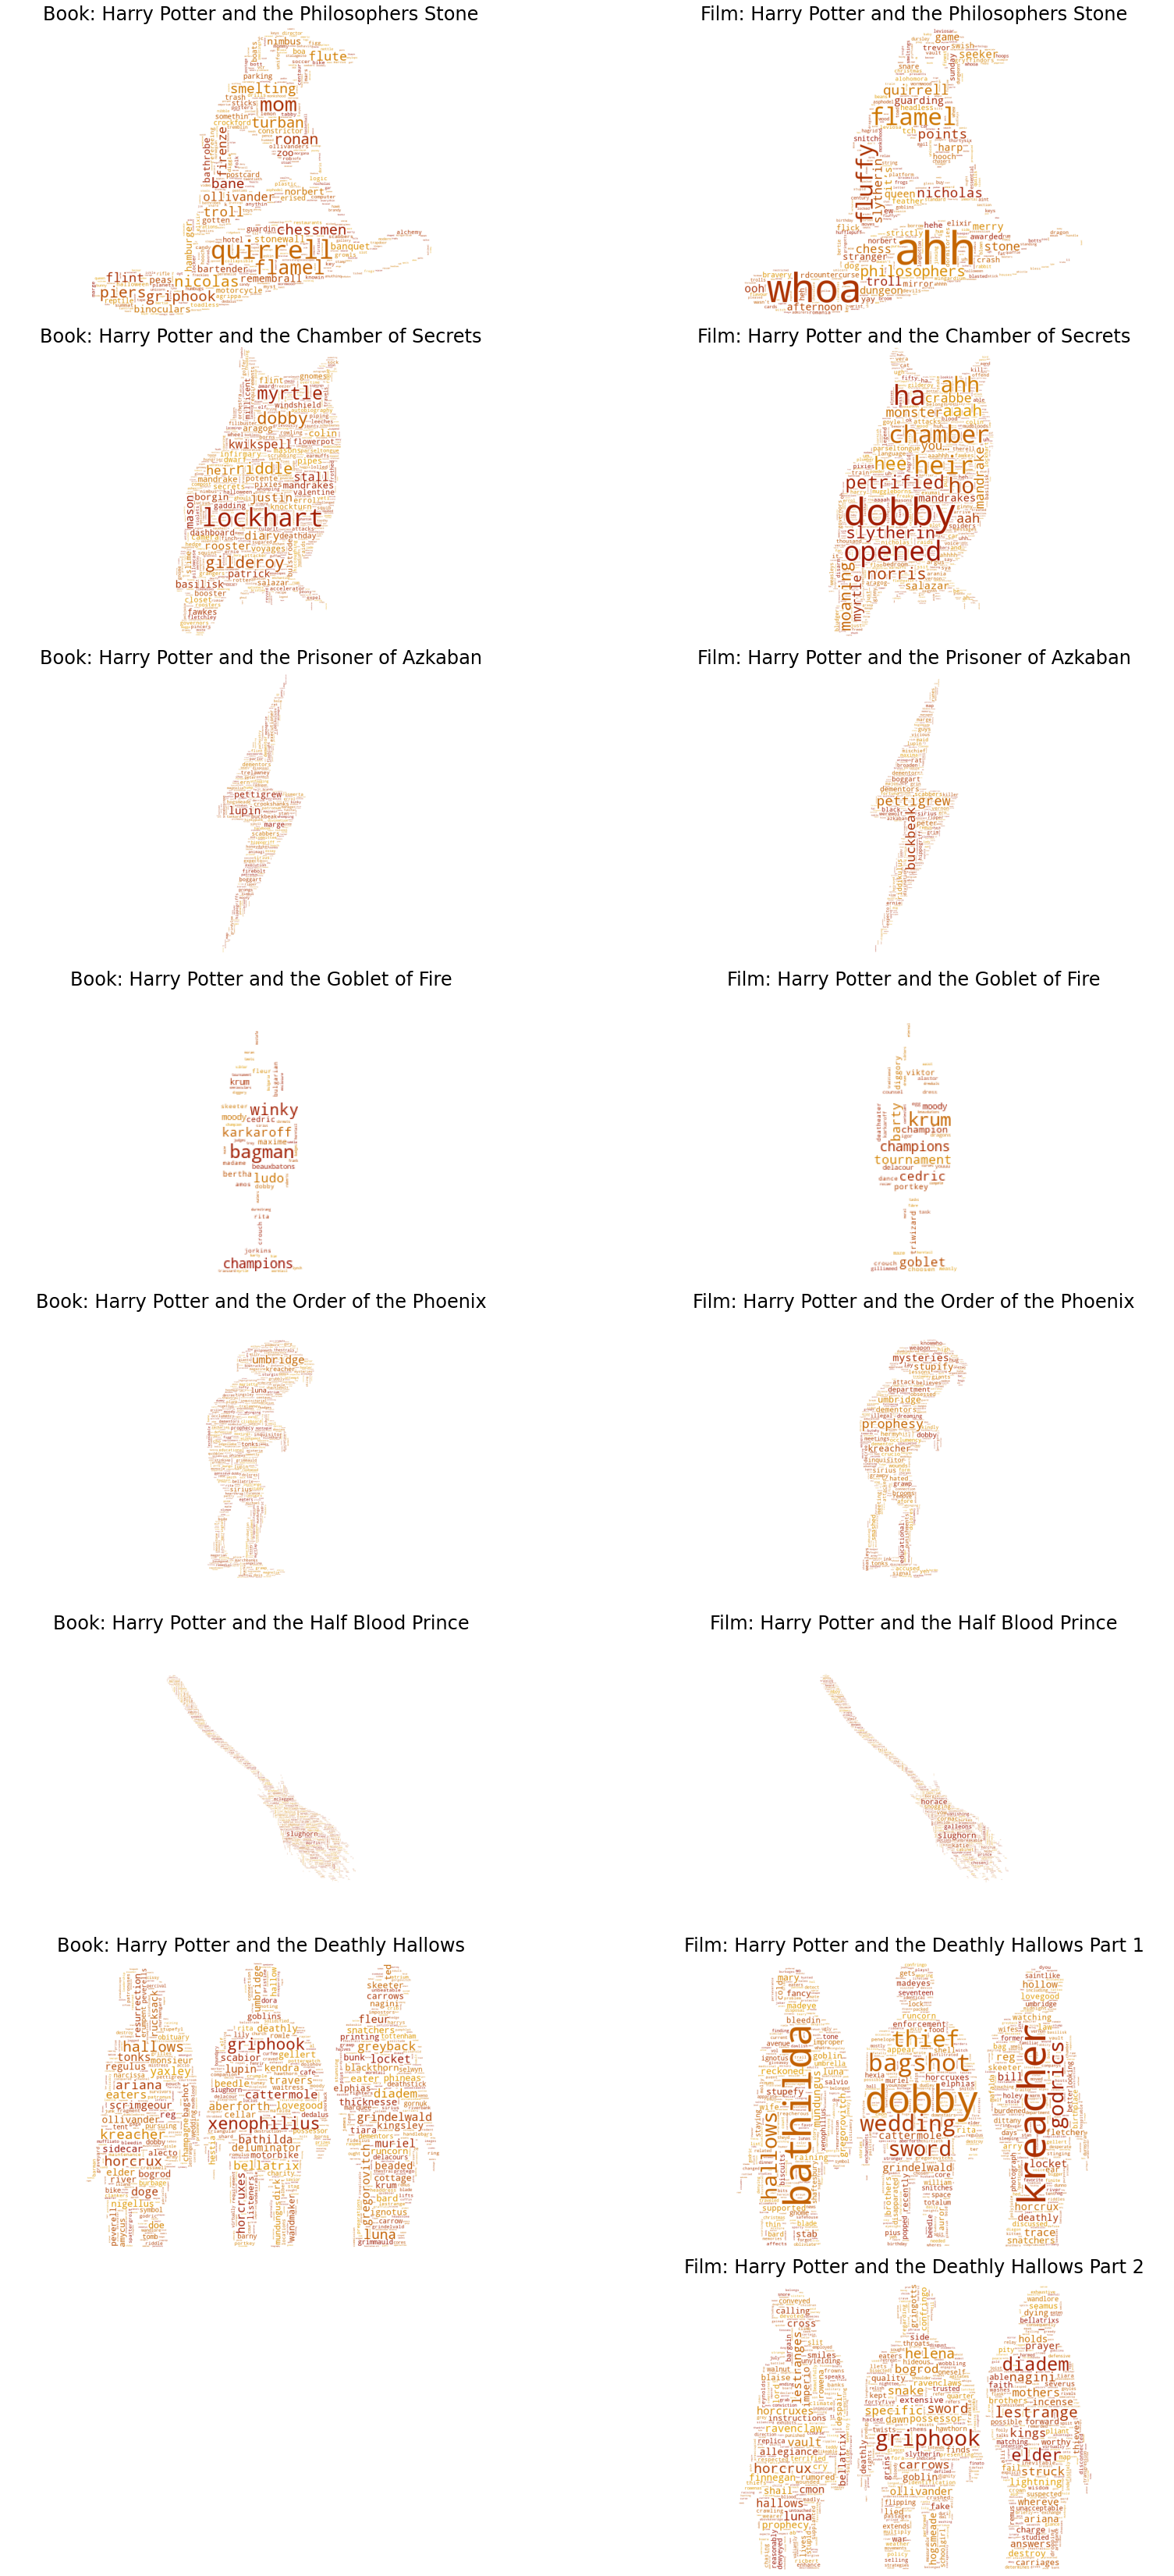

In [81]:
url =  url =  {0:'http://clipart-library.com/images_k/harry-potter-silhouette-images/harry-potter-silhouette-images-2.png',
        1:"https://i.pinimg.com/564x/78/95/4f/78954f32223c94550d9c281927200367.jpg",
        2:"https://media1.popsugar-assets.com/files/thumbor/saPAsDJmr-bXSRHD_P0JGsuR62c/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2018/10/12/010/n/44785883/527e37cfe31bdaff_Lightning-Bolt/i/Harry-Potter-Lightning-Bolt-Scar.jpg",
        3:"http://www.clker.com/cliparts/0/7/4/1/1517142689581760434harry-potter-goblet-of-fire-clipart.med.png",
        4:"https://cdn130.picsart.com/328325593084211.png",
        5:"https://i.etsystatic.com/10919371/r/il/901807/1538210364/il_1588xN.1538210364_ei12.jpg",
        6:"http://clipart-library.com/images_k/harry-potter-silhouette-images/harry-potter-silhouette-images-3.png"
        }

fig, ax = plt.subplots(ncols = 2, nrows= 8, figsize=(30, 60))
fig.subplots_adjust(hspace = 0.1, wspace=0)

for i in range(8):

    if i!=7:
        icon = read_img_from_url(url[i]).convert("RGBA") #Image.open(icon_path).convert("RGBA")
        mask = Image.new("RGB", (icon.size[0],icon.size[1]), (255,255,255))
        mask.paste(icon,icon)
        mask = np.array(mask)
        generate_wordcloud_plots(mask,TF_IDF[i],ax[i,0],i+1,hp_name_lis)
        generate_wordcloud_plots(mask,TF_IDF_film[i],ax[i,1],i+1,hp_film_lis)

        
    else:
        icon = read_img_from_url(url[i-1]).convert("RGBA") #Image.open(icon_path).convert("RGBA")
        mask = Image.new("RGB", (icon.size[0],icon.size[1]), (255,255,255))
        mask.paste(icon,icon)
        mask = np.array(mask)
        generate_wordcloud_plots(mask,TF_IDF_film[i],ax[i,1],i+1,hp_film_lis)
    #fig.patch.set_visible(False)
    
    
fig.delaxes(ax[i,0])

plt.savefig("WordClouds.png", format="PNG")
plt.show()
    



**<font color=Green>Interpretation<font>**

In the figure above, the TF-IDF word clouds for each film and book can be compared. Larger words have larger importance. 

**Harry Potter and the Philosopher's Stone**
    
In the first film we detect exclamation words such as "ahh" and "woah" which means that they are not common in the other films. That could be because the first film is more of a childrens movie.
Both the book and film word cloud contain the word "Flamel" which is the name of the maker of the philosopher’s stone and "Quirrel", who was one of the villains of the first book. "Fluffy" also has high importance in the film, but that was the three headed dog Harry, Ron and Hermione encounter in the Forbidden Corridor. Interestingly, Fluffy is not in the book word cloud.
    
**Harry Potter and the Chamber of Secrets**
    
In the second book and film word clouds we observe that "Lockhart" is the largest word in the book but "Dobby" in the films. Gilderloy Lockhart was the Defence Against the Dark Arts teacher the semester the second book happend. According to the Harry Potter fandom [[page]](https://harrypotter.fandom.com/wiki/List_of_differences_between_the_Harry_Potter_books_and_films), several scenes from the book containing Lockhart were omitted in the films. This is probably because Dobby appears in every book except two and only appears in two films, making his TF-IDF score larger in these films. Dobby is of smaller importance in the books versus films. This could also be because the film script only contains character dialogues and Dobby always refers to himself in the third person, so it makes sene that the word "Dobby" appears often than others.
    
**Harry Potter and the Prisoner of Azkaban**

In the word clouds for the third book and film we the word "Pettigrew" be one of the largest words for both film and book. In *Harry Potter and the Prisoner of Azkaban* he was exposed of betraying Harry's parents and framing Sirius Black of murder. We also see that Buckbeak, the hippogriff, which is basically a mixture of a horse and a bird, is one of the most important words in the film but not as much in the books. Perhaps the film producers wanted to keep Buckbeak to a high importance in the film since making the creature took more than a year for the animators as they wanted to make Buckbeak look as real as possible [[ref]](https://www.nbcnews.com/id/wbna5182794).

**Harry Potter and the Goblet of Fire** 

This book was about a competition called the Triwizard Tournament held at Hogwards so seeing the word "champion" appear large in both word clouds is not surprising. "Krum", and "Cedric" appear in both word clouds as they were one of the people competing in the tournament. The word "Bagman" has the most weight in the book word cloud but is not to be found in the film word cloud. This is a character who played a major role in the books but was completely absent from the film [[ref]](https://harrypotter.fandom.com/wiki/List_of_differences_between_the_Harry_Potter_books_and_films).
 
    
**Harry Potter and the Order of Phoenix**
  
Here we see a lot of common words in both word clouds. Such as "Umbridge" who played a large part in the story as she became the Headmistress of Hogwarts after Professor Dumbledore had been fired. "Prophecy" is also prominent in both word clouds. In the story it was revealed that Sybill Trelawney had made a prochecy 16 years ago about Harry Potter defying Voldemort.
    
**Harry Potter and the Half Blood Prince**
    
In these word clouds we observe "Slughorn" to be the most important word in both films and movies. He teaches potions this particular school year and becomes a big part of the storyline as it is revealed that many years ago he mistakenly helped Voldemort achieve mortality. We observe that "Mclaggen", who escorted Hermione to the christmas party is very prominent in the book but not the film.
    
**Harry Potter and the Deathly Hallows**
    
Here we see again that the word "Dobby" is large in the film word cloud but not the book. The possible reasoning for this was explained before, but *Harry Potter and the Deathly Hallows Part 1* is the second film Dobby appears in. We also see that "Xenophilius", who is Luna Lovegood's father, is very large in the books but not in the films. He however does appear in the Part 1 film. Perhaps he is only refferred to as mister Lovegood by the other characters.
    
 


## 5.2 Character Dialogue (in films) vs Degree Distribution <a class="anchor" id="section_5_2"></a>

We would expect more connected characters to also have more dialogue in the films. Here we will explore if that assumption holds by counting the dialogue for each character as well as the word count.

In [82]:
#Combine all films into one dataframe
film_df = film_dict['1']

for key,df_ in film_dict.items():
    if key!='1':
        film_df=film_df.append(df_,ignore_index = True)

In [83]:

# This creates a new dataframe which containes the character dialogue of every film and the word count.

grouped_df = film_df.groupby(['character'])
Dialog_count_df = pd.DataFrame(grouped_df.size().reset_index(name = "DialogCount"))\
                                .sort_values(by='DialogCount',ascending=False)




film_df['WordCount']=film_df['dialog'].apply(lambda x: len(x.split()))
    
    
WordCount_df = film_df.groupby('character')['WordCount'].sum().reset_index().\
                                    sort_values(by='WordCount',ascending=False)



WordsDialog = WordCount_df.merge(Dialog_count_df, on="character",how='inner')\
                                .sort_values(by='DialogCount',ascending=True)


In [84]:
# Extract the degree distribution

degree_dist=dict(G.degree())

degree_dist_sorted = dict(sorted(degree_dist.items(), key=lambda item: item[1],reverse=True))
                          
    

degree_df=pd.DataFrame({'character':degree_dist_sorted.keys(),'Degree':degree_dist_sorted.values()})

In [85]:
# Some of the names are different in the Network vs. in the film dataset. 

# Muna að breyta þegar það er komin ný network.


lis_from=['Voldemort','Alastor Moody','Vernon Dursley','Nearly Headless Nick','Rolanda Hooch','Tom Riddle',\
 'Rosmerta','The Fat Lady','Bloody Baron','Basilisk','Arabella Figg','Muriel','Alecto Carrow',\
    'Mrs. Granger','Mr. Granger','Mykew Gregorovitch',\
         'Ernest Macmillan','James Potter','Bartemius Crouch Junior','Barty Crouch Sr','Stanley Shunpike',\
         'Collin Creevey','Pansy parkinson']

lis_to = ['Lord Voldemort','Mad-Eye Moody','Vernon Dudley','Nearly-Headless Nick','Madam Hooch','Tom Marvolo Riddle',\
'Madam Rosmerta','The Fat Friar','The Bloody Baron','Basil','Mrs Figg','Auntie Muriel','Carrow',\
'Mrs Granger','Mr Granger', 'Gregorovitch','Ernie Macmillan','James Potter I',\
'Barty Crouch Jr','Barty Crouch Sr','Stan Shunpike','Colin Creevey','Pansy Parkinson']


WordsDialog['character']=WordsDialog['character'].replace(lis_from,lis_to)

film_df['character']=film_df['character'].replace(lis_from,lis_to)

WordsDialog = WordsDialog.groupby('character').sum().reset_index()


#Merge the degree dataframe with the Film Dialogue dataset.

HP_df = degree_df.merge(WordsDialog, on="character",how='inner')

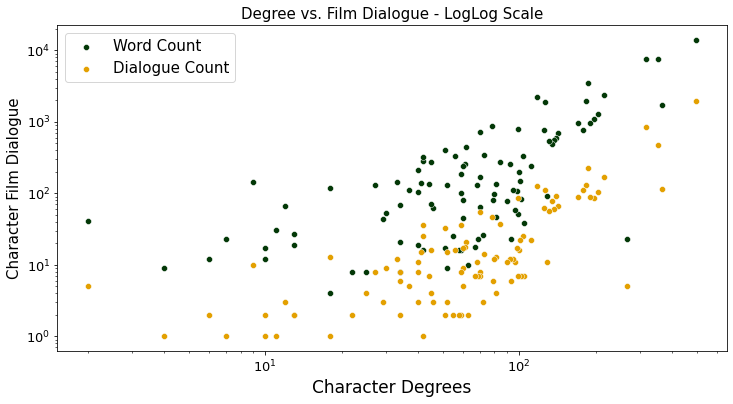

In [86]:
# Plot the degree distribution with the film dialogue count and word count 

plt.figure(figsize=(12,6))

Degree_WC_df =HP_df.groupby('character')['Degree','WordCount'].sum().reset_index()

sns.scatterplot(x=HP_df.Degree,y=HP_df.WordCount,color='#033807',label='Word Count')
sns.scatterplot(x=HP_df.Degree,y=HP_df.DialogCount,color='#e3a000',label='Dialogue Count')

plt.yscale('log');
plt.xscale('log');
plt.xlabel('Character Degrees',fontsize=FONTSIZE);
plt.ylabel('Character Film Dialogue',fontsize=FONTSIZE-2);
plt.title('Degree vs. Film Dialogue - LogLog Scale',fontsize=FONTSIZE-2);
plt.yticks(fontsize=FONTSIZE-4);
plt.xticks(fontsize=FONTSIZE-4);
plt.legend(fontsize=FONTSIZE-2);

plt.savefig('WordCount_degree.png')

**<font color=Green>Interpretation<font>**

The characters with the highest degree, i.e. the most connected characters, would be expected to have more instances and dialogues in the films. The figure above is a log-log plot and shows that there is a logarithmic relationship between the two. Relationships of the form $y=ax^k$ appear as straight lines in a log–log graph. From that we can interpret character film word count and instances to be related to the character degrees such that for characters with higher degrees, the word count/ dialogue count in the films is the degree in the power of some exponent value. So basically, the more connected a character is, the more often and more words it will speak in the films, which makes perfect sense!

## 5.3 Sentiment Analysis <a class="anchor" id="section_5_3"></a>

### 5.3.1 Films vs. Books and Character Sentiment Scores <a class="anchor" id="section_5_3_1"></a>

Here we will calculate the overall sentiment scores for each film and book as well as the dialogue of characters and compare between books and films. Do some characters say "happier" things in the films vs. books? And do their happiness scores change with time? We will do this comparison for some of the main characters.

In [87]:
book_char_sents = {}
for i in range(1,8):
     book_char_sents[i]=GetBookCharSents(Book_dialogues[str(i)],char_book_dialog_count)
        
map_movie = {"Harry Potter and the Philosopher's Stone":'1',\
            'Harry Potter and the Chamber of Secrets':'2',\
           'Harry Potter and the Prisoner of Azkaban':'3',\
            'Harry Potter and the Gobelt of Fire':'4',\
            'Harry Potter and the Order of the Phoenix':'5',\
            'Harry Potter and the Half-Blood Prince':'6',\
       'Harry Potter and the Deathly Hallows Part 1':'7',\
       'Harry Potter and the Deathly Hallows Part 2':'8'}

film_df['movie_number']=film_df['movie'].map(map_movie)

In [88]:
#Find character dialogue sentiments scores for the films

film_sent_dict = {}

for i in range(1,9):
    
    film_i = film_df[film_df.movie_number==str(i)]
    film_sent_dict[str(i)]=GetFilmCharSents(WordsDialog,film_i)

In [89]:
film_char_sent_df = pd.DataFrame.from_dict(film_sent_dict,orient='index').stack().reset_index()\
                    .rename(columns={'level_0':'FilmNumber','level_1':'Character',0:'FilmSentiment'}).sort_values(by='FilmNumber')


book_char_sent_df=pd.DataFrame.from_dict(book_char_sents,orient='index').stack().reset_index()\
                    .rename(columns={'level_0':'BookNumber','level_1':'Character',0:'BookSentiment'})

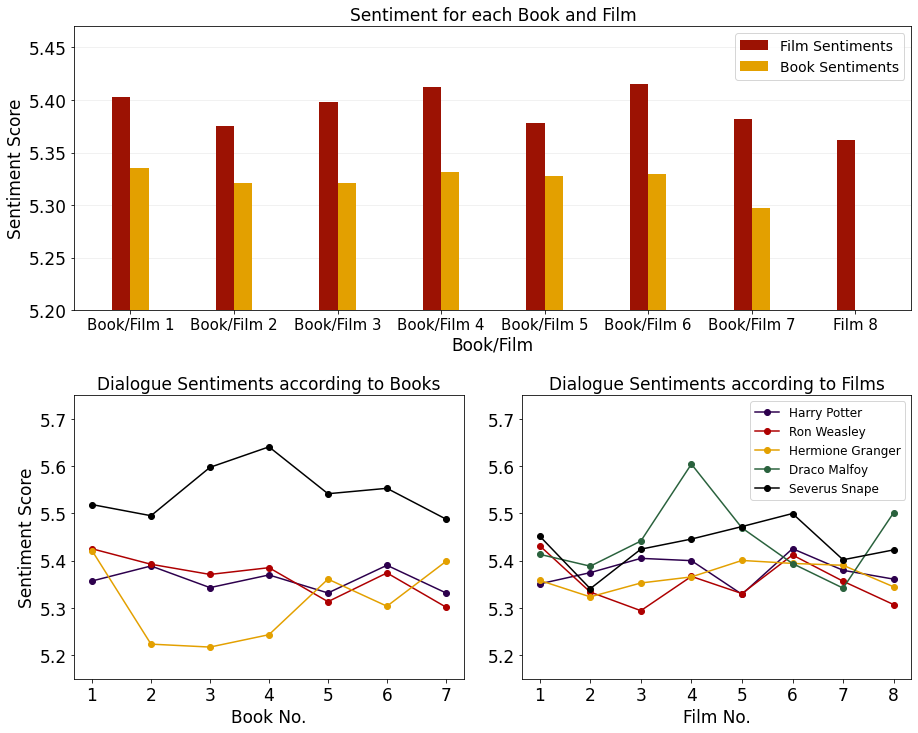

In [90]:
chars=['Harry Potter','Ron Weasley','Hermione Granger','Draco Malfoy','Severus Snape']
colors = [purple,"#AE0001",yellow,"#2A623D","black"] #color palette

fig,ax = plt.subplots(nrows=2, ncols=2,gridspec_kw={
                           'height_ratios': [1.25, 1]})
fig.set_size_inches(15,12)
fig.subplots_adjust(wspace=0.15,hspace=0.3)

i=0

#plot the sentiment evolution for each character
for char in chars:
    
    
    plt.subplot(2,2,3)

    plot_df = book_char_sent_df[book_char_sent_df.Character==char]

    plt.plot(plot_df.BookNumber,plot_df.BookSentiment,'o-',label=char,color=colors[i]);
    plt.xlabel('Book No.',fontsize=FONTSIZE)
    plt.ylabel('Sentiment Score',fontsize=FONTSIZE)
    plt.yticks(fontsize=FONTSIZE);
    plt.xticks(fontsize=FONTSIZE);
    plt.title('Dialogue Sentiments according to Books',fontsize=FONTSIZE)
    plt.ylim([5.15,5.75])


    
    plt.subplot(2,2,4)

    plot_df = film_char_sent_df[film_char_sent_df.Character==char]

    plt.plot(plot_df.FilmNumber,plot_df.FilmSentiment,'o-',label=char,color=colors[i]);
    plt.xlabel('Film No.',fontsize=FONTSIZE)
    #plt.ylabel('Sentiment Score',fontsize=FONTSIZE)
    plt.ylim([5.15,5.75])
    plt.yticks(fontsize=FONTSIZE);
    plt.xticks(fontsize=FONTSIZE);
    plt.title('Dialogue Sentiments according to Films',fontsize=FONTSIZE)
    plt.legend(fontsize=12)
    i+=1
    
    
#Sort the film and book sentiment dict
film_sentiments=dict(sorted(film_sentiments.items(), key=lambda x: x[0], reverse=False))
book_sentiments=dict(sorted(book_sentiments.items(), key=lambda x: x[0], reverse=False))

#Plot the film/book overall sentiments

x = np.linspace(0,8,8)


book_sentiments['8']=0
lis = ['Book/Film '+num for num in film_sentiments.keys()]


lis[-1]='Film 8'
plt.subplot(2,2,(1,2))
plt.grid(axis='y', color='#EEEEEE',zorder=0)
plt.bar(x,film_sentiments.values(),width=0.2,color='#9c1203',label='Film Sentiments',zorder=3);
plt.bar(x+0.2,book_sentiments.values(),width=0.2,color='#e3a000',label='Book Sentiments',zorder=4);


plt.legend(fontsize=14)
plt.ylim([5.20,5.47]);
plt.title('Sentiment for each Book and Film', fontsize = FONTSIZE);
plt.ylabel('Sentiment Score', fontsize = FONTSIZE);
plt.xlabel('Book/Film', fontsize = FONTSIZE);
plt.xticks(np.linspace(0,8,8)+0.1,lis,fontsize=15);
plt.yticks(fontsize=FONTSIZE);



plt.savefig("EvolCharDialogueSents.png", format="PNG")
plt.show()
    
    

**<font color=Green>Interpretation<font>**

Sentiment analysis was applied to the book and film datasets. From the figure in the upper panel we observe the sentiment scores for each book and film. We observe that the book sentiments are lower overall, but it is hard to compare the two because the books include more text and a storyline while the film scripts include only character dialogues. However, it is interesting to see that we observe a similar pattern for the two. The first book and film have a pretty high sentiment score, then it decreases, then increases again for *Harry Potter and the Goblet of Fire*. It is hardly surprising that *Harry Potter and the Deadly Hallows (Parts 1 and 2)* has the lowest sentiment scores. The final books and films have a more sinister tone since they tell the story of how the war against evil ends.
    
The figures in the lower panel show the evolution of some of the character dialogue sentiment scores for the books and films. We observe that Draco Malfoy and Severus Snape have higher sentiment scores than the other characters. This is interesting as they are one of the darker characters of the series. Perhaps their dialogues are being misinterpreted as 'happy'. For instance, Malfoy's remark, "*The Dementors Send Their Love, Potter!*" may be taken positively, but Harry Potter fans realize it's actually a dig. It is interesting to see the sentiment score development of Hermione. In books 2 to 4 they are the lowest among the others but then increases in book 5. We see a similar increase for the film dialogue sentiments. Hermione is kind of portrayed as an annoying perfectionist who hates breaking the rules in the beginning of the story. Then, when she continues to stand up for her friends and even begins breaking the rules to help them, she evolves into a more likeable character [[ref]](https://www.sparknotes.com/lit/harrypotter/character/hermione-granger/).

In [91]:
#Get information from df which is data from Kaggle in pandas dataframe
char_info = df.copy() 
char_info.head()

,Name,Link,Descr,Gender,Species/Race,Blood,School,Profession
0,Mrs Abbott,https://www.hp-lexicon.org/character/abbott-fa...,"Mrs. Abbott was the mother of Hannah Abbott, a...",Female,witch,Muggle-born,Unknown,Unknown
1,Hannah Abbott,https://www.hp-lexicon.org/character/abbott-fa...,Hannah Abbott is a Hufflepuff student in Harry...,Female,witch,Half-blood,Hogwarts - Hufflepuff,Landlady of the Leaky Cauldron
2,Abel Treetops,https://www.hp-lexicon.org/character/abel-tree...,Abel Treetops was a wizard from Cincinnati who...,Male,wizard,Unknown,Unknown,Unknown
3,Euan Abercrombie,https://www.hp-lexicon.org/character/abercromb...,Euan Abercrombie was a small boy with prominen...,Male,wizard,Unknown,Hogwarts - Gryffindor,Unknown
4,Aberforth Dumbledore,https://www.hp-lexicon.org/character/dumbledor...,"Aberforth Dumbledore was a tall, thin, grumpy-...",Male,wizard,Half-blood,Hogwarts - Student,Barman


In [92]:
## Create dataframe that contains info about if character appears in the books(1) or not (0)
apperances_books_df = pd.DataFrame()
apperances_books_df = apperances_books_df.append(appearance_dict_books, ignore_index=True).T.reset_index()
#apperances_books_df
apperances_books_df = apperances_books_df.rename(columns={'index': 'Name', 0: 'apperance_books'})
apperances_books_df #= apperances_books_df.loc[apperances_books_df['apperance_books'] == '[]','apperance_books']= '0'

apperances_books_df['apperance_books_int'] = apperances_books_df['apperance_books'].where(apperances_books_df['apperance_books'].str.len() > 0, np.nan)
apperances_books_df['apperance_books_int'] = apperances_books_df['apperance_books_int'].notnull().astype('int')

In [93]:
## Create dataframe that contains info about if character appears in movies(1) or not(0)
apperances_movies_df = pd.DataFrame()
apperances_movies_df = apperances_movies_df.append(appearance_dict_movies, ignore_index=True).T.reset_index()
#apperances_movies_df
apperances_movies_df = apperances_movies_df.rename(columns={'index': 'Name', 0: 'apperance_movies'})
#apperances_movies_df 
apperances_movies_df['apperance_movies_int'] = apperances_movies_df['apperance_movies'].where(apperances_movies_df['apperance_movies'].str.len() > 0, np.nan)
apperances_movies_df['apperance_movies_int'] = apperances_movies_df['apperance_movies_int'].notnull().astype('int')

In [94]:
print('There are',len(apperances_books_df[apperances_books_df['apperance_books_int'] == 1 ] ), 'characters in the books and' ,len(apperances_movies_df[apperances_movies_df['apperance_movies_int'] == 1 ]), 'characters in the movies')

There are 506 characters in the books and 348 characters in the movies


In [95]:
apperances_df =  apperances_books_df.merge(apperances_movies_df, on = 'Name')
del apperances_df['apperance_books']
del apperances_df['apperance_movies']
apperances_df.head()

,Name,apperance_books_int,apperance_movies_int
0,Abel Treetops,0,0
1,Aberforth Dumbledore,1,1
2,Abernathy,0,0
3,Able Fleming,0,0
4,Able Spudmore,0,0


In [96]:
## Create dataframe that contains info about sentiment score for characters
sentiment_df = pd.DataFrame()
sentiment_df = sentiment_df.append(sent_dict, ignore_index=True)
sentiment_df = sentiment_df.append(word_count_dict, ignore_index = True)
sentiment_df = sentiment_df.T.reset_index()
sentiment_df = sentiment_df.rename(columns={'index': 'Name', 0: 'sentiment_score', 1 : 'word_count'})
sentiment_df.head()

,Name,sentiment_score,word_count
0,Abel Treetops,5.397309,4024.0
1,Aberforth Dumbledore,5.317356,13101.0
2,Abernathy,5.374243,5753.0
3,Able Fleming,5.410037,4136.0
4,Able Spudmore,5.407016,4016.0


In [97]:
#Merge sentiment_df, apperances_df
sentiment_df = sentiment_df.merge(apperances_df, on='Name', how='inner')

#Merge char info and sentiment_df
Char_sentiment = sentiment_df.merge(char_info, on='Name', how='inner')

Char_sentiment.head()

,Name,sentiment_score,word_count,apperance_books_int,apperance_movies_int,Link,Descr,Gender,Species/Race,Blood,School,Profession
0,Abel Treetops,5.397309,4024.0,0,0,https://www.hp-lexicon.org/character/abel-tree...,Abel Treetops was a wizard from Cincinnati who...,Male,wizard,Unknown,Unknown,Unknown
1,Aberforth Dumbledore,5.317356,13101.0,1,1,https://www.hp-lexicon.org/character/dumbledor...,"Aberforth Dumbledore was a tall, thin, grumpy-...",Male,wizard,Half-blood,Hogwarts - Student,Barman
2,Abernathy,5.374243,5753.0,0,0,https://www.hp-lexicon.org/character/abernathy/,Abernathy was Tina Goldstein’s pompous boss in...,Male,wizard,Unknown,Unknown,"MACUSA employee, then servant of Grindelwald"
3,Able Fleming,5.410037,4136.0,0,0,https://www.hp-lexicon.org/character/able-flem...,Able Fleming was president of the Magical Cong...,Male,wizard,Unknown,Unknown,President of MACUSA circa 1770
4,Able Spudmore,5.407016,4016.0,0,0,https://www.hp-lexicon.org/character/spudmore-...,Able Spudmore was one of the founders and owne...,Male,wizard,Unknown,Unknown,Racing broom manufacturer


In [98]:
#clean house and blood data
Char_sentiment['House'] = Char_sentiment['School'].str.split('- ').str[-1]
Houses = ['Gryffindor','Hufflepuff','Ravenclaw','Slytherin']
Char_sentiment['House'] = Char_sentiment['House'].apply(lambda x: 'Unknown' if x not in Houses else x) # only look at the four houses
Char_sentiment['Blood'] = Char_sentiment['Blood'].apply(lambda x: 'Muggle-born' if x == 'Muggle' else x) # We had both Muggle and Muggle-born but that is the same
Char_sentiment.head()

,Name,sentiment_score,word_count,apperance_books_int,apperance_movies_int,Link,Descr,Gender,Species/Race,Blood,School,Profession,House
0,Abel Treetops,5.397309,4024.0,0,0,https://www.hp-lexicon.org/character/abel-tree...,Abel Treetops was a wizard from Cincinnati who...,Male,wizard,Unknown,Unknown,Unknown,Unknown
1,Aberforth Dumbledore,5.317356,13101.0,1,1,https://www.hp-lexicon.org/character/dumbledor...,"Aberforth Dumbledore was a tall, thin, grumpy-...",Male,wizard,Half-blood,Hogwarts - Student,Barman,Unknown
2,Abernathy,5.374243,5753.0,0,0,https://www.hp-lexicon.org/character/abernathy/,Abernathy was Tina Goldstein’s pompous boss in...,Male,wizard,Unknown,Unknown,"MACUSA employee, then servant of Grindelwald",Unknown
3,Able Fleming,5.410037,4136.0,0,0,https://www.hp-lexicon.org/character/able-flem...,Able Fleming was president of the Magical Cong...,Male,wizard,Unknown,Unknown,President of MACUSA circa 1770,Unknown
4,Able Spudmore,5.407016,4016.0,0,0,https://www.hp-lexicon.org/character/spudmore-...,Able Spudmore was one of the founders and owne...,Male,wizard,Unknown,Unknown,Racing broom manufacturer,Unknown


In [99]:
#Let's identify the most and least contented characters.
find_happiest_and_least_happiest_char(Char_sentiment,'')

The  most happiest  character in Harry Potter  is Rose Granger-Weasley
Rose Granger-Weasley is the older of Ron Weasley and Hermione Granger’s two children, and their only daughter. She is sorted into Gryffindor House at Hogwarts. On 1 September 2017, Rose was preparing to take the Hogwarts Express to her first year at school, and was nervous about the sorting (DH/e). Hermione… 
The  least happiest  character in Harry Potter is  Antonin Dolohov
Antonin Dolohov was a particularly sadistic Death Eater, one of Tom Riddle’s friends after leaving school (HBP20). He was sent to Azkaban for the murders of Gideon and Fabian Prewett (OP25). Dolohov escaped from Azkaban early in 1996, along with Bellatrix Lestrange and several other high-security prisoners, and rejoined… 


**<font color=Green>Interpretation<font>**

This is fascinating since the expected outcome for the happiest character would be someone like Luna Lovegood, and the expected outcome for the unhappiest character would be Lord Voldemort. Could the quantity of text on the character's fandom page influence the sentiment score?

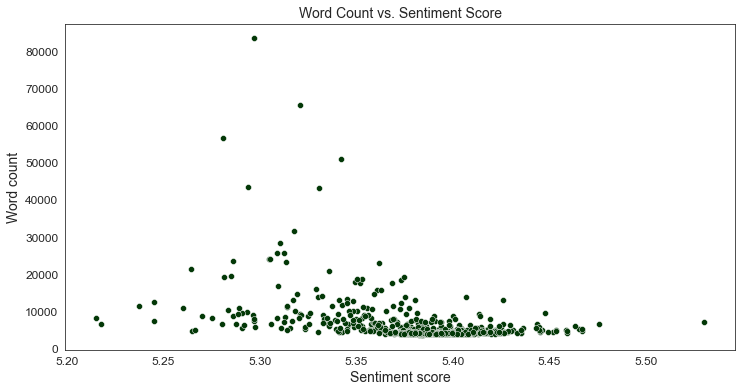

In [100]:
plt.figure(figsize=(12,6))
sns.set_style("white")
sns.scatterplot(data=Char_sentiment, x="sentiment_score", y="word_count",color = '#033807')
plt.title("Word Count vs. Sentiment Score", fontsize=14)
plt.xlabel("Sentiment score", fontsize = 14)
plt.ylabel("Word count", fontsize = 14)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

**<font color=Green>Interpretation<font>**

This is very interesting; it appears that fandom pages with a lot of text have lower sentiment than those with a small amount of text. Lets look at characters with over 20000 words in their pages.

In [101]:
Char_sentiment_20000 = Char_sentiment.loc[Char_sentiment['word_count'] > 20000]
Char_sentiment_20000[['Name','sentiment_score','word_count']].sort_values(by = 'sentiment_score', ascending = False)

,Name,sentiment_score,word_count
371,Gilderoy Lockhart,5.361594,22940.0
454,Hermione Granger,5.341875,51131.0
344,Fred Weasley,5.335801,20966.0
634,Minerva McGonagall,5.330440,43259.0
27,Albus Dumbledore,5.320649,65523.0
808,Rubeus Hagrid,5.317884,31614.0
844,Sirius Black,5.313694,23284.0
253,Draco Malfoy,5.312456,25765.0
354,Gellert Grindelwald,5.310618,28481.0
240,Dolores Umbridge,5.308798,25707.0


In [102]:
find_happiest_and_least_happiest_char(Char_sentiment_20000, 'that is extensively discussed')

The  most happiest  character in Harry Potter that is extensively discussed is Gilderoy Lockhart
Gilderoy Lockhart is a celebrity wizard and author, on staff for the 1992-1993 school year at Hogwarts as Professor of Defense Against the Dark Arts. 
The  least happiest  character in Harry Potter is that is extensively discussed Peter Pettigrew
Pettigrew entered Hogwarts at the same time as Sirius Black, James Potter, and Remus Lupin, a group of friends who came to call themselves the “Marauders.” He was not as skilled a wizard as his friends, and seemed to hang out with them largely because he idolized them (PA10). 


**<font color=Green>Interpretation<font>**

These results makes more sence since Ginny Weasley is portrayed as relatively innocent in the narrative and has romantic feelings for Harry, she may appear in scenes where everything is going well. While Lord Voldemort is the dark Lord and the main villian in the story. 

#### Sentiment of different groups

This chapter investigates whether the spirit of the books is captured, that is, whether the sentiment is similar. As well as whether sentiment differs based on gender, house, and blood.

In [103]:
# Books
print_stats_csg(Char_sentiment.loc[(Char_sentiment['apperance_books_int'] == 1)],'Books characters',True,True,True,True)
print('-----------------------------------------------------------------------------------------')

# Movies
print_stats_csg(Char_sentiment.loc[(Char_sentiment['apperance_movies_int'] == 1)],'Films characters',True,True,True,True)

STATISTICS FOR BOOKS CHARACTERS
The average sentiment for Books characters is: 5.370439415015949
The median sentiment for Books characters is: 5.381886617152389
The 10th percentile value for the sentiment for Books characters is: 5.313796129762559
The 90th percentile value for the sentiment for Books characters is: 5.404170007244628
 
-----------------------------------------------------------------------------------------
STATISTICS FOR FILMS CHARACTERS
The average sentiment for Films characters is: 5.365433052586604
The median sentiment for Films characters is: 5.374934116355715
The 10th percentile value for the sentiment for Films characters is: 5.302470525220119
The 90th percentile value for the sentiment for Films characters is: 5.416202469227073
 


Let plot these information as well as the sentiment distribution

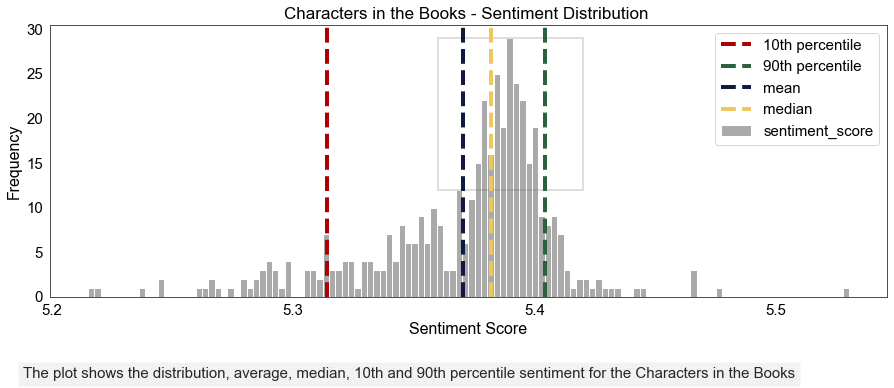

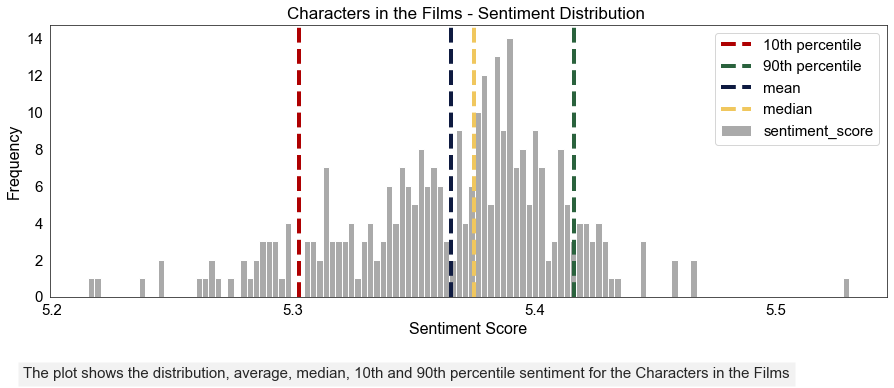

In [104]:
sentiment_distribution(Char_sentiment.loc[(Char_sentiment['apperance_books_int'] == 1)],"Characters in the Books",True)    
sentiment_distribution(Char_sentiment.loc[(Char_sentiment['apperance_movies_int'] == 1)],"Characters in the Films")   

**<font color=Green>Interpretation<font>**

According to the plot above, the characters in the books are happier than the characters in the films. It also demonstrates that the characters in the films have the full sentiment range of the characters in the books.
From the graph where the sentiment score is plotted against the number of words, it can be seen that characters with sentiment scores of approximately 5.4 have few words on their fandom page. That should imply that they are not the main characters. Looking at the box in the first figure, the number of characters on the range from 5.45 to 5.55 is much lower in the films than in the books, whereas other characters on different ranges appear in both the films and the books. This means that the screenwriters decided to eliminate some unimportant characters from the novel in order to reduce the size of the cast and prevent confusion.

##### Now we want to look at the difference between Females and Males.

In [105]:
#Creating dataframe with all characters that appear in the book or the movie
bo_sent = Char_sentiment.loc[(Char_sentiment['apperance_books_int'] == 1)]
mo_sent = Char_sentiment.loc[(Char_sentiment['apperance_movies_int'] == 1)]
bo_mo = bo_sent.merge(mo_sent, on=['Name','sentiment_score','Gender','apperance_books_int','apperance_movies_int'],how='outer')
bo_mo = bo_mo[['Name','sentiment_score','Gender','apperance_books_int','apperance_movies_int']]

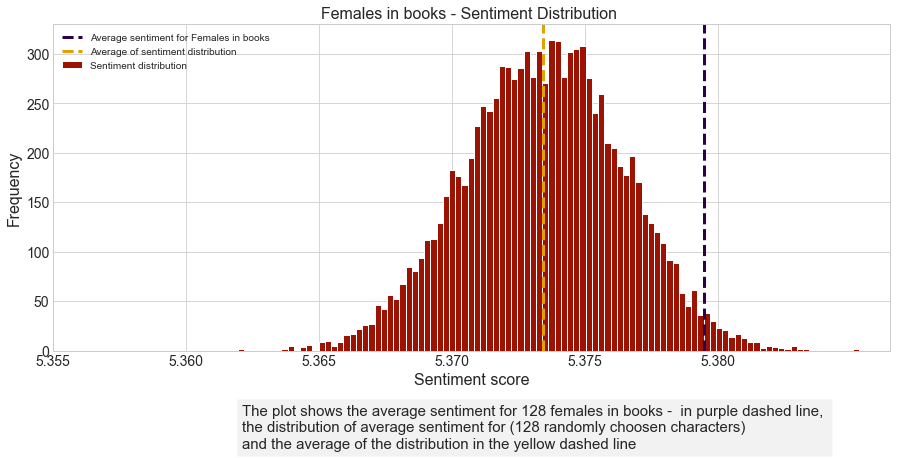

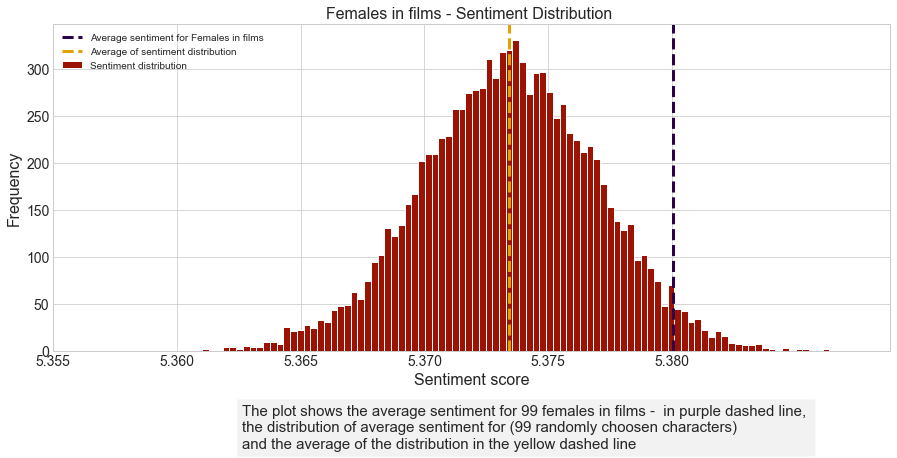

In [106]:
#Females
plot_hypothesis_distribution(bo_mo.loc[(bo_mo['Gender'] == 'Female') & (bo_mo['apperance_books_int'] == 1)],'Females in books - ')
plot_hypothesis_distribution(bo_mo.loc[(bo_mo['Gender'] == 'Female') & (bo_mo['apperance_movies_int'] == 1)],'Females in films - ')


**<font color=Green>Interpretation<font>**

Although there are 29 fewer female characters in the films, the overall sentiment remains nearly unchanged: It is, however, slightly lower in films, indicating that a few minor characters were left out.

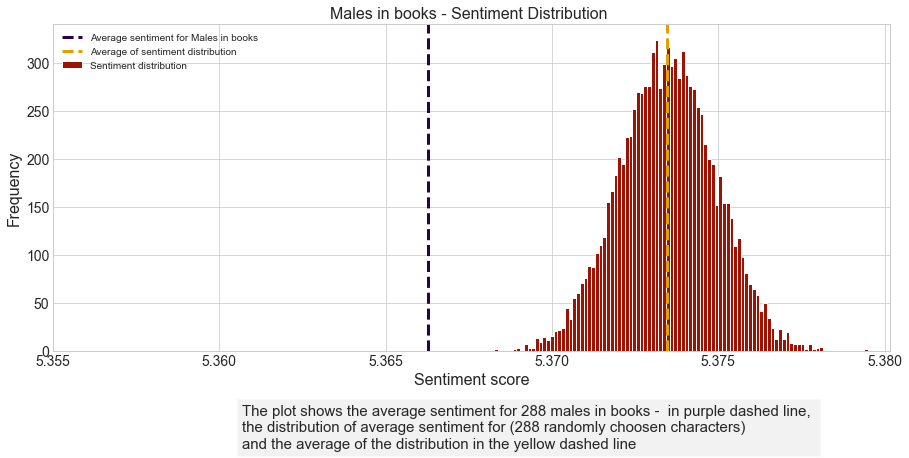

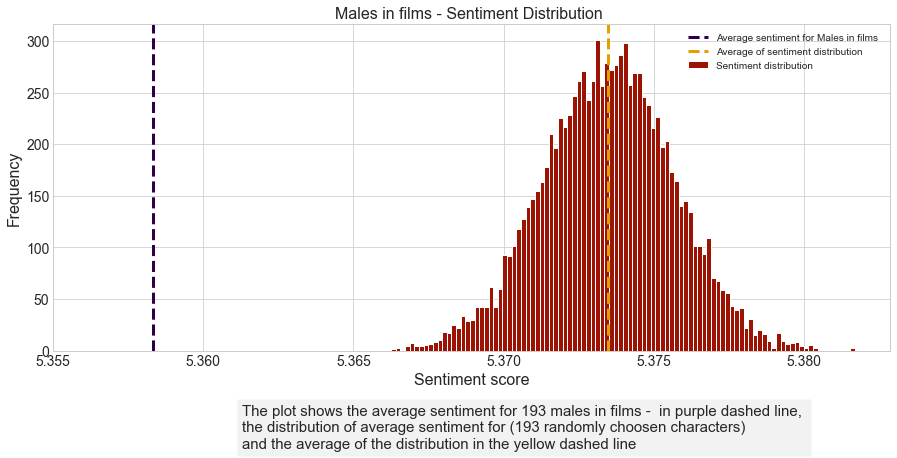

In [107]:
#Males
plot_hypothesis_distribution(bo_mo.loc[(bo_mo['Gender'] == 'Male') & (bo_mo['apperance_books_int'] == 1)],'Males in books - ')
plot_hypothesis_distribution(bo_mo.loc[(bo_mo['Gender'] == 'Male') & (bo_mo['apperance_movies_int'] == 1)],'Males in films - ')

**<font color=Green>Interpretation<font>**

There are 95 fewer male characters in the films, the overall sentiment changes a lot between the films. Earlier we discovered that the major characters tend to have lower sentiment than minor ones. This shows that many minor characters were left out of the films.

Earlier, we discovered that Lord Voldemort, Peter Pettigrew, and others who are evil in the Harry Potter story are not as happy as other characters. Both Lord Voldemort and Peter Pettigrew are male, and according to the book: [Re-thinking Men](https://doi.org/10.4324/9781315606132), the villains or evil characters are typically male. Our first hypothesis is that women are generally happier than a same sized set of randomly selected characters. our second hypothesis is that male characters are generally unhappire than a same sized set of randomly selected characters. To determine this, it is most effective to plot a sentiment distribution for randomly selected characters and the mean of female and male sentiment for the same number of characters.

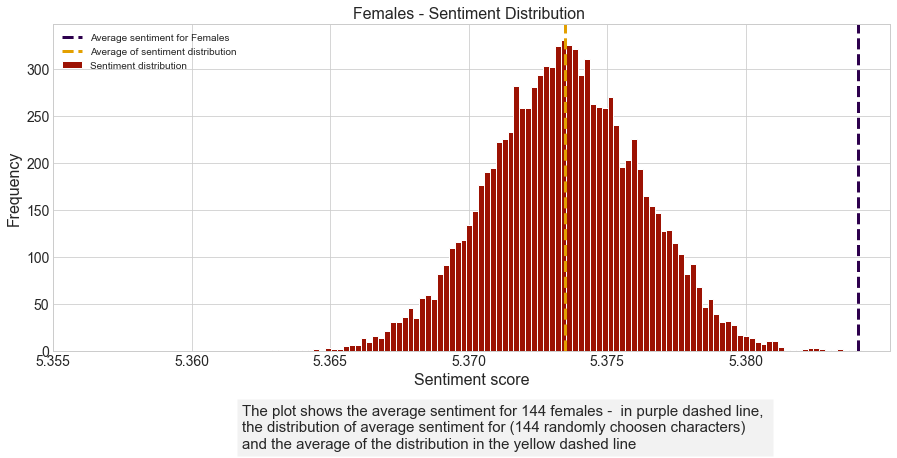

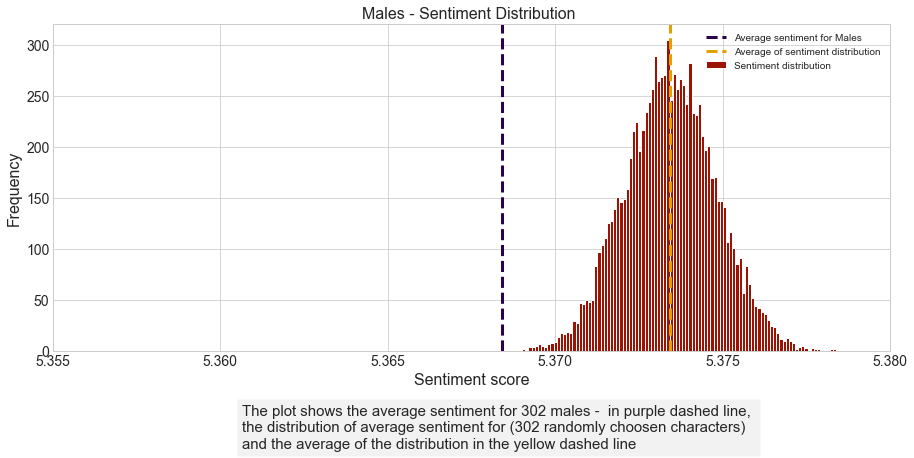

In [108]:
plot_hypothesis_distribution(bo_mo.loc[bo_mo['Gender'] == 'Female'],'Females - ')
plot_hypothesis_distribution(bo_mo.loc[bo_mo['Gender'] == 'Male'],'Males - ')

**<font color=Green>Interpretation<font>**

To find out if the hypothesis stand we used the function plot_hypothesis_distribution to plot the distribution for 10000 iterations as well as the average of all the iterations and finally the average for either females or males to compare to. We can see that for both females and males that their average sentiment is quite far from the average of averages found in the shuffeling process.

**Hypothesis 1:**
Like we can see in the first figure the average sentiment score for females is higher than the average of the iterations in the shuffeling process leading to the first hypothesis being true: The females are happier on average. 

**Hypothesis 2:**
The second figure shows that the average  for male sentiment score is lower that the average of all the iterations in the shuffeling process leading to the second hypothesis also being true: Males are unhappier on average.


**For Fun lets look at which house and blood is the happiest.**

In [109]:
#House
print_stats_csg(Char_sentiment.loc[Char_sentiment['House'] == 'Gryffindor'],'Gryffindor')
print_stats_csg(Char_sentiment.loc[Char_sentiment['House'] == 'Hufflepuff'],'Hufflepuff')
print_stats_csg(Char_sentiment.loc[Char_sentiment['House'] == 'Ravenclaw'],'Ravenclaw')
print_stats_csg(Char_sentiment.loc[Char_sentiment['House'] == 'Slytherin'],'Slytherin')
print('-----------------------------------------------------------------------------------------')

#Blood
print_stats_csg(Char_sentiment.loc[Char_sentiment['Blood'] == 'Pure blood'],'Pure blood')
print_stats_csg(Char_sentiment.loc[Char_sentiment['Blood'] == 'Muggle-born'],'Muggle-born')
print_stats_csg(Char_sentiment.loc[Char_sentiment['Blood'] == 'Half-blood'],'Half-blood')

STATISTICS FOR GRYFFINDOR
The average sentiment for Gryffindor is: 5.361133208602503
 
STATISTICS FOR HUFFLEPUFF
The average sentiment for Hufflepuff is: 5.374039809731246
 
STATISTICS FOR RAVENCLAW
The average sentiment for Ravenclaw is: 5.3708944722114325
 
STATISTICS FOR SLYTHERIN
The average sentiment for Slytherin is: 5.367430302607548
 
-----------------------------------------------------------------------------------------
STATISTICS FOR PURE BLOOD
The average sentiment for Pure blood is: 5.3737983772680105
 
STATISTICS FOR MUGGLE-BORN
The average sentiment for Muggle-born is: 5.383837034528196
 
STATISTICS FOR HALF-BLOOD
The average sentiment for Half-blood is: 5.366533248659741
 


**<font color=Green>Interpretation<font>**

According to these findings Hufflepuff is the happiest house, and Muggle-born are the happiest of the bloods. This is interesting because the majority of the major characters are in Gryffindor and Slytherin, and these characters have a lot of text on their wiki fandom page; we know from prior findings that characters with a lot of text, and thus are important, have lower sentiment. Muggle born characters are that have non magical parents tends to be happy one of these characters is Hermione Granger.

# Conclusions <a class="anchor" id="chapter5"></a>

According to the above degree analysis, we can see that the Harry Potter character network for both the books and films follow  Power-law distributions with degree exponents around $3$. However, the film network distributions are not as well-defined as the book network distribution. A plausible explanation is that major characters were left out of the films. Computations also revealed that both networks are small-world and scale-free, as expected from the literature [[ref]](https://ijeecs.iaescore.com/index.php/IJEECS/article/viewFile/3766/2098). This confirms that the films quite accurately capture the network structure of the books, with the exception of the distributions diverging. Character importance had similar patterns between the films and the films, but results showed that some characters had more influence in the films.

Interesting distinctions between the books and films were shown by the TF-IDF word clouds. In several instances, we saw that words were given a lot more weight in the films than they were in the books. However, the word clouds of the book and the related film typically share similar vocabulary, indicating that the films were successful in conveying the book's main message. The scatterplot showing the logarithmic relationship between character dialogue and degrees indicated that more important characters also had more dialogue in the films. The sentiment scores of each film and book showed that they both have similar patterns which confirms that the films managed to capture the feel of the books. A surprising finding was that Severus Snape and Draco Malfoy had higher sentiment scores than Harry, Ron and Hermione across books and films. Nonetheless, it is interesting to see that this holds both for films and books. Telling us that the films comply with the interpretation of the characters in the books.

The analysis show that there is difference between characters in the books and those in the films, it is due to the fact that characters have been omitted from the films. It was interesting to see that the characters that have high sentiment score tend to be minor characters. The results of the study in this notebook showed that there is bias towards happiness of female characters both in the films and the books. The male characters omitted from the films were proportionally higher than the female characters, which could indicate that there were more minor males character proportionally than females.

The most difficult task was generating the network from the Fandom articles as we did a wrong approach at first which resulted in the network not having any power-law behaviour, which was strange compared to the literature. Using another approach by linking characters based on links to other character pages in the Fandom this issue was fixed and the resulting networks had power-law degree distributions. There were also challenges with the algorithm to extract characters dialogues because of difficulty of finding the speaker when only pronouns were used.
